# Credit - Exploratory Data Analysis - Case Study
Submitted by: Vikram Mathur

#### Objective
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.


# Table Of Contents<br/>

1. [Setup Environment - Pre Requisities](#SetupEnvironment)<br/><br/>
2. [Data Preparation for Analysis ](#DP)<br/>
    2.1  [Run Pandas Profiler](#DP)<br/>
    2.2  [Remove Non-Useful Columns](#DP-Col)<br/>
    2.3  [Handling Missing Data - Impute](#DP-Missing)<br/>
    2.4  [Check Datatypes](#DP-Datatypes)<br/>
    2.5  [Handling Outliers](#DP-Outlier)<br/>
    2.6 [Data Cardinality](#DP-Cardinality)<br/>
    2.7 [Data Cleaning](#DP-Cleaning)<br/>
    2.8 [Bins for Continuous Variables](#DP-Bins)<br/>
    2.9 [Derived Metrics](#DP-Metrics)<br/><br/>
3. [Data Analysis](#DA)<br/>
    3.1 [Custom Functions](#DA-Func)<br/>
    3.2 [Data Imbalance](#DA-Imbalance)<br/>
    3.3 [Univariate Analysis for Categorical Variables](#DA-Uni)<br/>
    3.4 [Univariate Analysis for Numerical Variables](#DA-Uni-Num)<br/>
    3.5 [Numerical Bivariate Analysis](#DA-CatBi-Num)<br/>
    3.5.1 [Correlation of Numerical Columns](#DA-Corr-Num)<br/>
    3.5.2 [Analysis on Current Application and Previous Application Joins](#DA-AP)<br/>
    3.6 [Bivariate Analysis on Categorical Variables - Impact & Across](#DA-CatBi)<br/>
    3.6.1  [Custom TOOL for Analysis](#DA-Tool)<br/>


<a id="SetupEnvironment"></a>

#  1. Setup Environment - Pre Requisites 
Library Installation and Path Set

In [1]:
#*************************************************************************************************************************
# Install following libraries.
#*************************************************************************************************************************
import ipywidgets as widgets # pip install ipywidgets
                            # jupyter nbextension enable --py widgetsnbextension
import pandas_profiling as pp # pip install pandas-profiling
import squarify # pip install squarify

#*************************************************************************************************************************
# Change the local path of the folder here. 
# All input CSV files to be stored on this path and the files names should not change.
# EDIT THE FOLLOWING LINE AND PROVIDE LOCAL PATH
#*************************************************************************************************************************
import os
os.chdir("C:/Users/madhumathur/Documents/UpGrad/EDA/CaseStudy/Credit EDA Case Study")

#Import Libraries
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Data
df_appl = pd.read_csv("application_data.csv")
df_prev_appl = pd.read_csv("previous_application.csv")

<a id="DP"></a>

#  2. Data Preparation for Analysis
## 2.1 Run Pandas Profiler

Executing profiler and analyzing results of the dataframe for both application_data and Previous Application dataframes. The subsequent cells provide the data interpretation and handling.

<b>Note: The profiler execution will take time. Kindly wait for the processing to complete.</b>

In [3]:
profile_appl = pp.ProfileReport(df_appl)
# Generate HTML file for viewing
profile_appl.to_file(outputfile="appl_output.html")
profile_appl

In [4]:
profile_prev_appl = pp.ProfileReport(df_prev_appl)
# Generate HTML file for viewing
profile_prev_appl.to_file(outputfile="prev_appl_output.html")
profile_prev_appl

<a id="DP-Col"></a>

## 2.2 Remove Non-Useful Columns

Based on the results of the profiler and running some basic analysis the non-useful columns are determined and dropped.

##### For Application_Data

In [5]:
# To find the missing values - summing up the missing values (column-wise)
#round(100*(df_appl.isnull().sum()/len(df_appl.index)), 2).sort_values(ascending = False)

In [6]:
# Determine and remove non-useful columns from Previous Application Data
# To find the missing values - summing up the missing values (column-wise)
pd.options.display.max_rows = None
ser_Col_MissingValues = round(100*(df_appl.isnull().sum()/len(df_appl.index)), 2).sort_values(ascending = False)
#print(ser_Col_MissingValues)

# All Columns having 47.40% missing values, # seem to have NO USEFULNESS for the loan defaulting analysis at hand and can be dropped.
lst_Cols_Drop = list(ser_Col_MissingValues[ser_Col_MissingValues > 47.40].index)
# Drop non-required columns
df_appl.drop(lst_Cols_Drop, axis = 1, inplace = True)

##### For Previous_Application_Data

In [7]:
# Determine and remove non-useful columns from Previous Application Data
# To find the missing values - summing up the missing values (column-wise)
ser_Col_MissingValues = round(100*(df_prev_appl.isnull().sum()/len(df_prev_appl.index)), 2).sort_values(ascending = False)
#print(ser_Col_missingValues)
# Columns having 99% or more null information can be dropped.
lst_Cols_Drop = list(ser_Col_MissingValues[ser_Col_MissingValues > 99].index)
# Drop non-required columns
df_prev_appl.drop(lst_Cols_Drop, axis = 1, inplace = True)

####   Data Interpretation 
1. All Columns having 47.40% missing values in the Application Data, # seem to have NO USEFULNESS for the loan defaulting analysis at hand and can be dropped.
2. All Columns having 99% + missing values in the Previous Application Data are to be dropped.

<a id="DP-Missing"></a>

## 2.3 Handling Missing Data


##### For Application_Data

EXT_SOURCE_3 Mean:0.5108529061800121
EXT_SOURCE_3 Median:0.5352762504724826
Recommendation on EXT_SOURCE_3: Is a Continuous Variable and should be imputed with the Median. Also, there is not much difference between the mean and median values 


EXT_SOURCE_2 Mean:0.5143926741308463
EXT_SOURCE_2 Median:0.5659614260608526
Recommendation on EXT_SOURCE_2: Is a Continuous Variable and should be imputed with the Median. Also, there is not much difference between the mean and median values


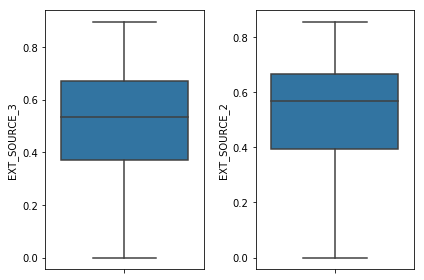

In [8]:
f, ax = plt.subplots(nrows=1,ncols=2)

sns.boxplot(y = 'EXT_SOURCE_3', data = df_appl, ax=ax[0])
print('EXT_SOURCE_3 Mean:' + str(df_appl['EXT_SOURCE_3'].mean()))
print('EXT_SOURCE_3 Median:' + str(df_appl['EXT_SOURCE_3'].median()))
print('Recommendation on EXT_SOURCE_3: Is a Continuous Variable and should be imputed with the Median. Also, there is not much difference between the mean and median values ')
print('\n')
sns.boxplot(y = 'EXT_SOURCE_2', data = df_appl, ax=ax[1])
print('EXT_SOURCE_2 Mean:' + str(df_appl['EXT_SOURCE_2'].mean()))
print('EXT_SOURCE_2 Median:' + str(df_appl['EXT_SOURCE_2'].median()))
print('Recommendation on EXT_SOURCE_2: Is a Continuous Variable and should be imputed with the Median. Also, there is not much difference between the mean and median values')
plt.tight_layout()
plt.show()

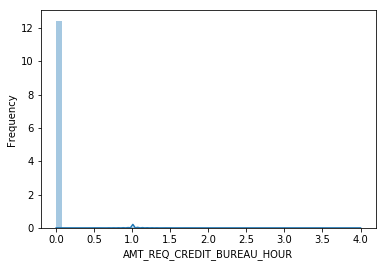

AMT_REQ_CREDIT_BUREAU_HOUR Mean: 0.006402448193930645
AMT_REQ_CREDIT_BUREAU_HOUR Median: 0.0


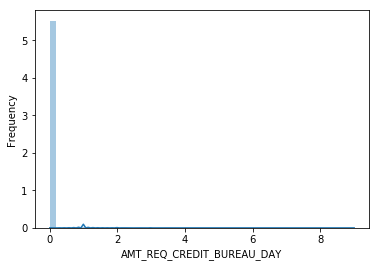

AMT_REQ_CREDIT_BUREAU_DAY Mean: 0.0070002105326475985
AMT_REQ_CREDIT_BUREAU_DAY Median: 0.0


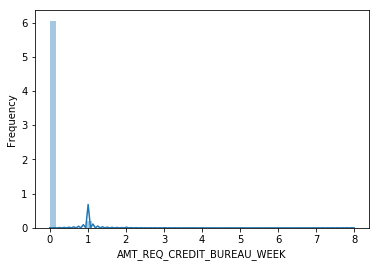

AMT_REQ_CREDIT_BUREAU_WEEK Mean: 0.0343619356973142
AMT_REQ_CREDIT_BUREAU_WEEK Median: 0.0


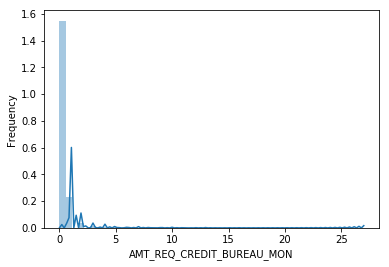

AMT_REQ_CREDIT_BUREAU_MON Mean: 0.26739526000781977
AMT_REQ_CREDIT_BUREAU_MON Median: 0.0


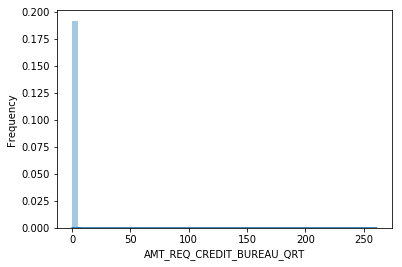

AMT_REQ_CREDIT_BUREAU_QRT Mean: 0.26547414959848414
AMT_REQ_CREDIT_BUREAU_QRT Median: 0.0


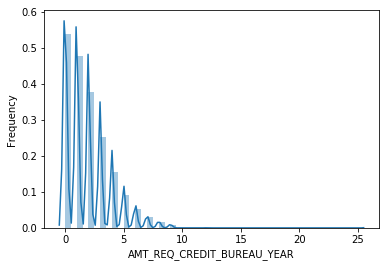

AMT_REQ_CREDIT_BUREAU_YEAR Mean: 1.899974435321363
AMT_REQ_CREDIT_BUREAU_YEAR Median: 1.0


In [9]:
def dist_plot_analysis(col):
    sns.distplot(df_appl[col].dropna())
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

cols_AMT_REQ_CREDIT = [col for col in df_appl if 'AMT_REQ_CREDIT' in col]

for i in cols_AMT_REQ_CREDIT:
    dist_plot_analysis(i)
    print(i, "Mean:", df_appl[i].mean())
    print(i, "Median:", df_appl[i].median())

AMT_GOODS_PRICE MEAN: 538396.2074288895
AMT_GOODS_PRICE MEDIAN: 450000.0


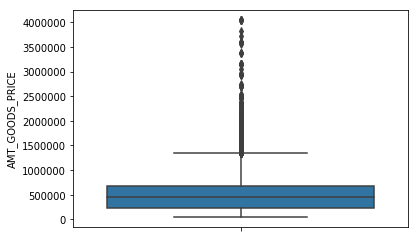

In [10]:
sns.boxplot(y = 'AMT_GOODS_PRICE', data = df_appl)
print('AMT_GOODS_PRICE MEAN: '+ str(df_appl['AMT_GOODS_PRICE'].mean()))
print('AMT_GOODS_PRICE MEDIAN: '+ str(df_appl['AMT_GOODS_PRICE'].median()))

####   Analysis and Recommendation for Imputation 

<b>Unordered Categorical Variables</b>
1. EMERGENCYSTATE_MODE               47.40%  - Is Categorical variable with Yes and No values. Leave the missing data as is and it can be ignored for imputation. 

2. OCCUPATION_TYPE                   31.35%  - Is Categorical variable and is imbalanced. Leave the missing data as is and it can be ignored for imputation. 

3. NAME_TYPE_SUITE                   0.42%  - Categorical column with 0.42% as missing values which can be imputed with unaccompanied, as that has appeared max number of times (248526).

<b>Discrete Numerical Variables</b>
4. AMT_REQ_CREDIT_BUREAU_YEAR        13.50% - Mean

5. AMT_REQ_CREDIT_BUREAU_MON         13.50% - Mean

6. AMT_REQ_CREDIT_BUREAU_WEEK        13.50% - Mean 

7. AMT_REQ_CREDIT_BUREAU_DAY         13.50% - Mean 

8. AMT_REQ_CREDIT_BUREAU_HOUR        13.50% - Mean 

9. AMT_REQ_CREDIT_BUREAU_QRT         13.50% - Mean

10. DEF_60_CNT_SOCIAL_CIRCLE         0.33%  -  High number of zeroes(91.4%). Highly imbalance.

11. OBS_60_CNT_SOCIAL_CIRCLE         0.33%  -  High number of zeroes(53.3%)

12. DEF_30_CNT_SOCIAL_CIRCLE         0.33%  -  High number of zeroes (88.2%). Highly imbalance.

13. OBS_30_CNT_SOCIAL_CIRCLE         0.33%  -  High number of zeroes (53.3%)

Above are Count Variables and can be imputed with mean. Also, there is not much difference in mean and median

<b>Continuous Numerical Variables</b>
14. EXT_SOURCE_3                     19.83% - Similar mean and median. No outliers. Impute with Median.

15. EXT_SOURCE_2                     0.21%  - Similar mean and median. No outliers. Impute with Median.

16. AMT_GOODS_PRICE                  0.09%  - High outliers. Impute with median.

Should be imputed with median based on outliers and being continuous numerical variables.

In [11]:
# Treating some missing values and nan values for the following as it is needed in analysis.
df_appl.loc[np.isnan(df_appl['AMT_GOODS_PRICE']), ['AMT_GOODS_PRICE']] = df_appl['AMT_GOODS_PRICE'].median()
df_appl.loc[np.isnan(df_appl['AMT_ANNUITY']), ['AMT_ANNUITY']] = df_appl['AMT_ANNUITY'].median()
df_appl.loc[np.isnan(df_appl['DAYS_LAST_PHONE_CHANGE']), ['DAYS_LAST_PHONE_CHANGE']] = df_appl['DAYS_LAST_PHONE_CHANGE'].median()

##### For Previous_Application_Data

<b>Continous Numerical Variables</b>

1. RATE_DOWN_PAYMENT              49.15%   - High outliers. Impute with median.
2. AMT_DOWN_PAYMENT               49.15%   - High outliers. Impute with median.
3. DAYS_TERMINATION               37.94%   - High outliers. Impute with median.
4. DAYS_FIRST_DRAWING             37.94%   - High outliers. Impute with median
5. DAYS_FIRST_DUE                 37.94%   - High outliers. Impute with median
6. DAYS_LAST_DUE_1ST_VERSION      37.94%   - High outliers. Impute with median
7. DAYS_LAST_DUE                  37.94%   - High outliers. Impute with median
8. AMT_GOODS_PRICE                20.86%   - High outliers. Impute with median
9. AMT_ANNUITY                    20.79%   - High outliers. Impute with median
 

<b>Discrete Numerical Variables</b>
10. CNT_PAYMENT                    20.79%  - Impute with median since there are outliers.

<b> Unordered Categorical Variables </b>
11. NAME_TYPE_SUITE                48.18%  - Categorical column with 49.1% as missing values which can be imputed with unaccompanied, as that has appeared max number of times (508970).
12. NFLAG_INSURED_ON_APPROVAL      37.94%  - Is Categorical variable with 1 and 0 values. Leave the missing data as is and it can be ignored for imputation.
13. PRODUCT_COMBINATION             0.02%  - Is categorical variable and missing data is very small. Leave the missing data and can be ignored for imputation

<a id="DP-Datatypes"></a>

## 2.4 Check Datatypes

In [12]:
# Based on profiler and report and review of columns taking action on following columns

#Imputing 0 and 1 for boolean columns instead of N and Y.
def change_to_bool(col):
    df_appl.loc[df_appl[col] == 'N', [col]] = '0'
    df_appl.loc[df_appl[col] == 'Y', [col]] = '1'
    df_appl[col] = df_appl[col].astype('int16').astype('bool')
        
change_to_bool("FLAG_OWN_CAR")
change_to_bool("FLAG_OWN_REALTY")

# Change datatype of all FLAG_, REG_, LIVE_ columns to boolean as they are categorical with 0 and 1 
# signifying Yes or No.
cols_Flag_bool = [col for col in df_appl if col.startswith('FLAG_')]
cols_Live_bool = [col for col in df_appl if col.startswith('LIVE_')]
cols_Reg_bool = [col for col in df_appl if col.startswith('REG_')]
cols_bool = cols_Flag_bool + cols_Live_bool + cols_Reg_bool
df_appl[cols_bool] = df_appl[cols_bool].astype('bool')

<a id="DP-Outlier"></a>

## 2.5 Handling Outliers

##### For Applicant_Data

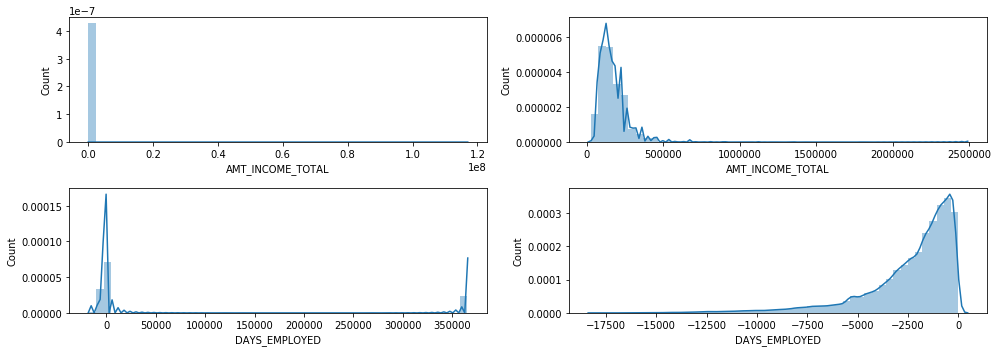

In [14]:
# Outliers Analysis
plt.figure(figsize=(14,5))
plt.subplot(221)
sns.distplot(df_appl['AMT_INCOME_TOTAL']);
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("Count")

plt.subplot(222)
sns.distplot(df_appl.loc[df_appl['AMT_INCOME_TOTAL'] < 2500000, 'AMT_INCOME_TOTAL']);
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("Count")

plt.subplot(223)
sns.distplot(df_appl['DAYS_EMPLOYED'].dropna());
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel("Count")

plt.subplot(224)
sns.distplot(df_appl.loc[df_appl['DAYS_EMPLOYED'] < 365243, 'DAYS_EMPLOYED']);
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Based on the profiler report for Application Data following columns show high degree of skewness.<br/>
1. AMT_INCOME_TOTAL is highly skewed (γ1 = 391.56) <mark>Skewed</mark><br/>
    - Column data is heavily skewed by the high income earners, where the highest income earning is 117,000,000 and the lowest is 25,650.<br/>
    - Income of 117,000,000. Seems self proclaimed and not verified. Or maybe its a data entry error.<br/>
    - Removing the larger outliers we can get a better picture of the distribution.

2. AMT_REQ_CREDIT_BUREAU_DAY is highly skewed (γ1 = 27.044) <mark>Skewed</mark>
3. AMT_REQ_CREDIT_BUREAU_QRT is highly skewed (γ1 = 134.37) <mark>Skewed</mark>
4. DAYS_EMPLOYED has an outlier - The histogram in profiler report, highlights this.<br/>

In [15]:
# Evident outlier for DAYS_EMPLOYED column
df_appl['DAYS_EMPLOYED'].replace(365243, df_appl['DAYS_EMPLOYED'].median(), inplace= True)

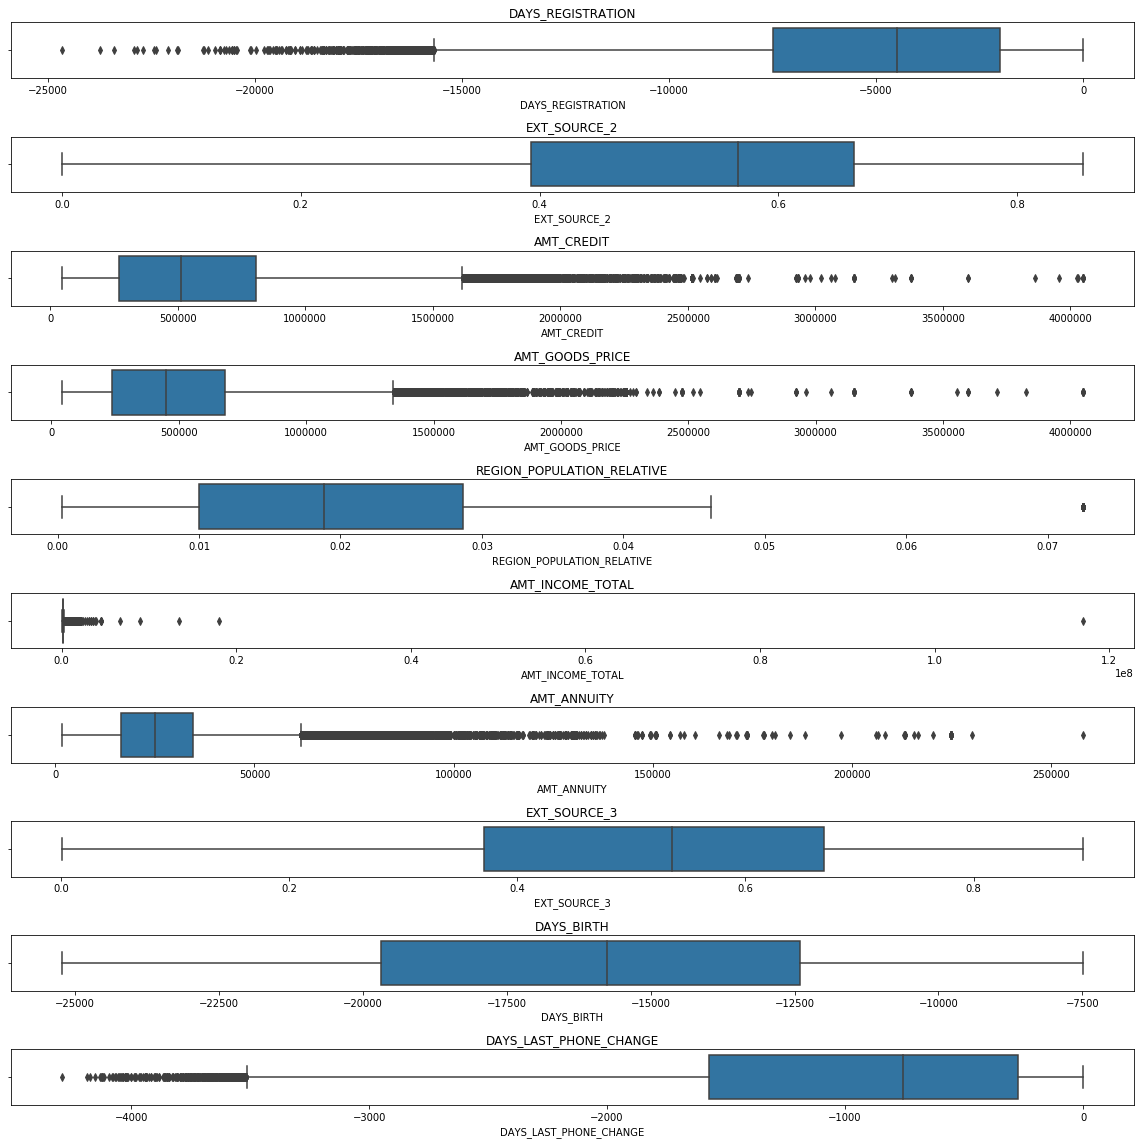

In [16]:
# Loop through Continuous Numerical Variables to Check Outliers
cols_continuous = ['DAYS_REGISTRATION', 'EXT_SOURCE_2', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 
             'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'EXT_SOURCE_3', 
             'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH']
def check_outliers_continuous(df, cols):
    f, ax = plt.subplots(nrows=len(cols)-1, figsize=(16,16))
    for i in range(0,len(cols)-1):
        sns.boxplot(df[cols[i]].dropna(), ax=ax[i])
        ax[i].title.set_text(cols[i])
    plt.tight_layout()
    plt.show()
    
check_outliers_continuous(df_appl, cols_continuous)

####    Treating Outliers 
 We will consider the normal graph for distribution and use Tukey rule for correcting the outliers for continuous numerical variables.<br/><br/>As per the Tukey's rule
 outliers are values more that 1.5 times the IQR range from the quartiles - either below Q1-1.5*IQR or above Q3+1.5IQR<br/><br/>
 We will impute the values of outliers with lower and upper bound found using the Tukey method.
 
 <b>Note:</b> Executing the following block will take some time. Kindly wait for the execution to complete.


In [17]:
def treat_outliers(df, col):
    q1, q3 = np.percentile(df[col].dropna(), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    #print(col, lower_bound, upper_bound)
    df[col][df[col] <= lower_bound] = lower_bound
    df[col][df[col] >= upper_bound] = upper_bound

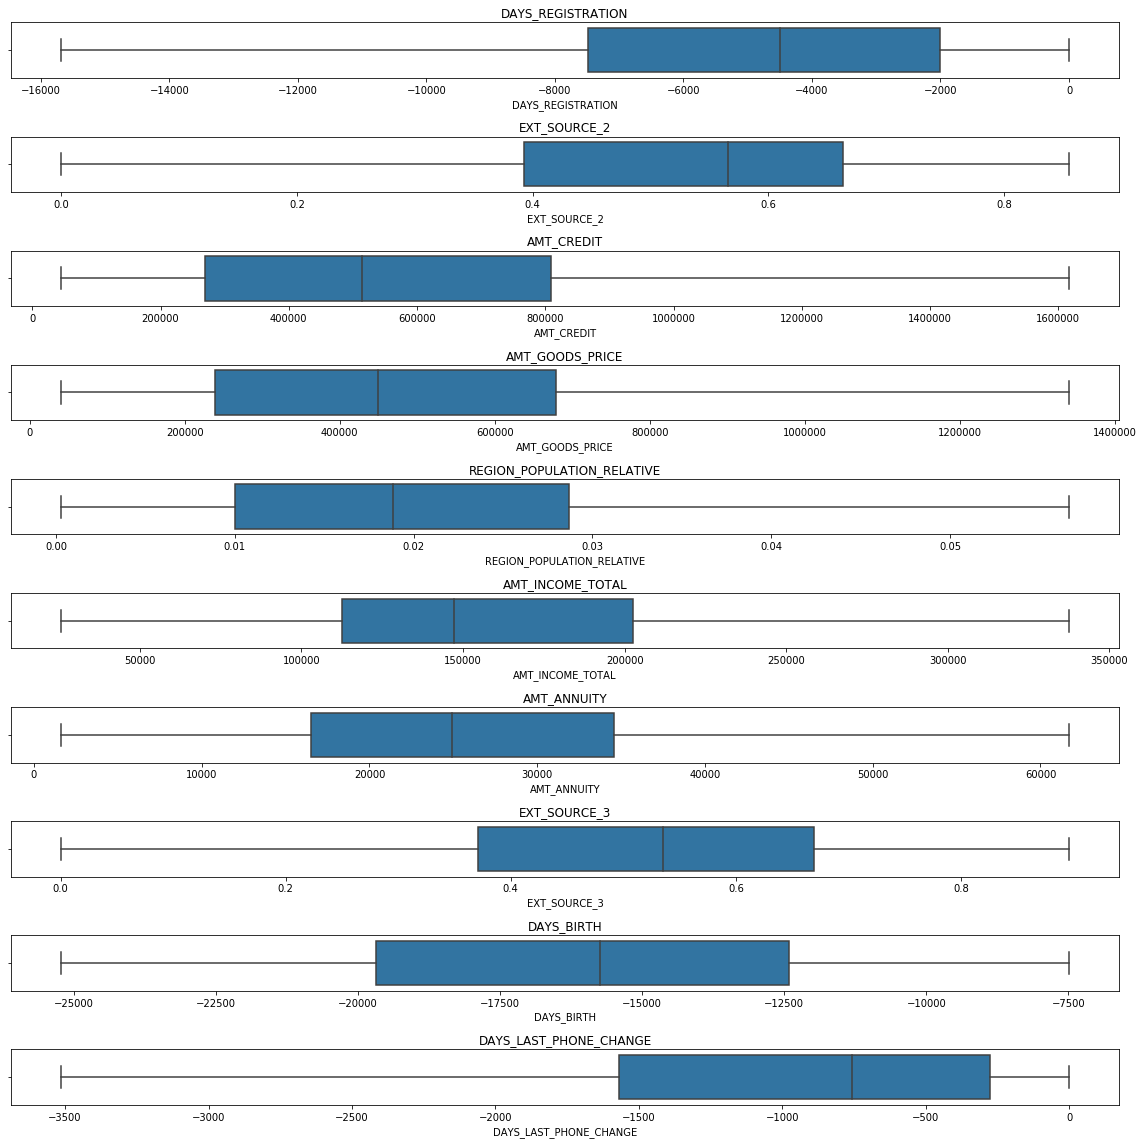

In [18]:
for i in cols_continuous:
    treat_outliers(df_appl, i)

check_outliers_continuous(df_appl, cols_continuous)


#### For Previous_Application_Data

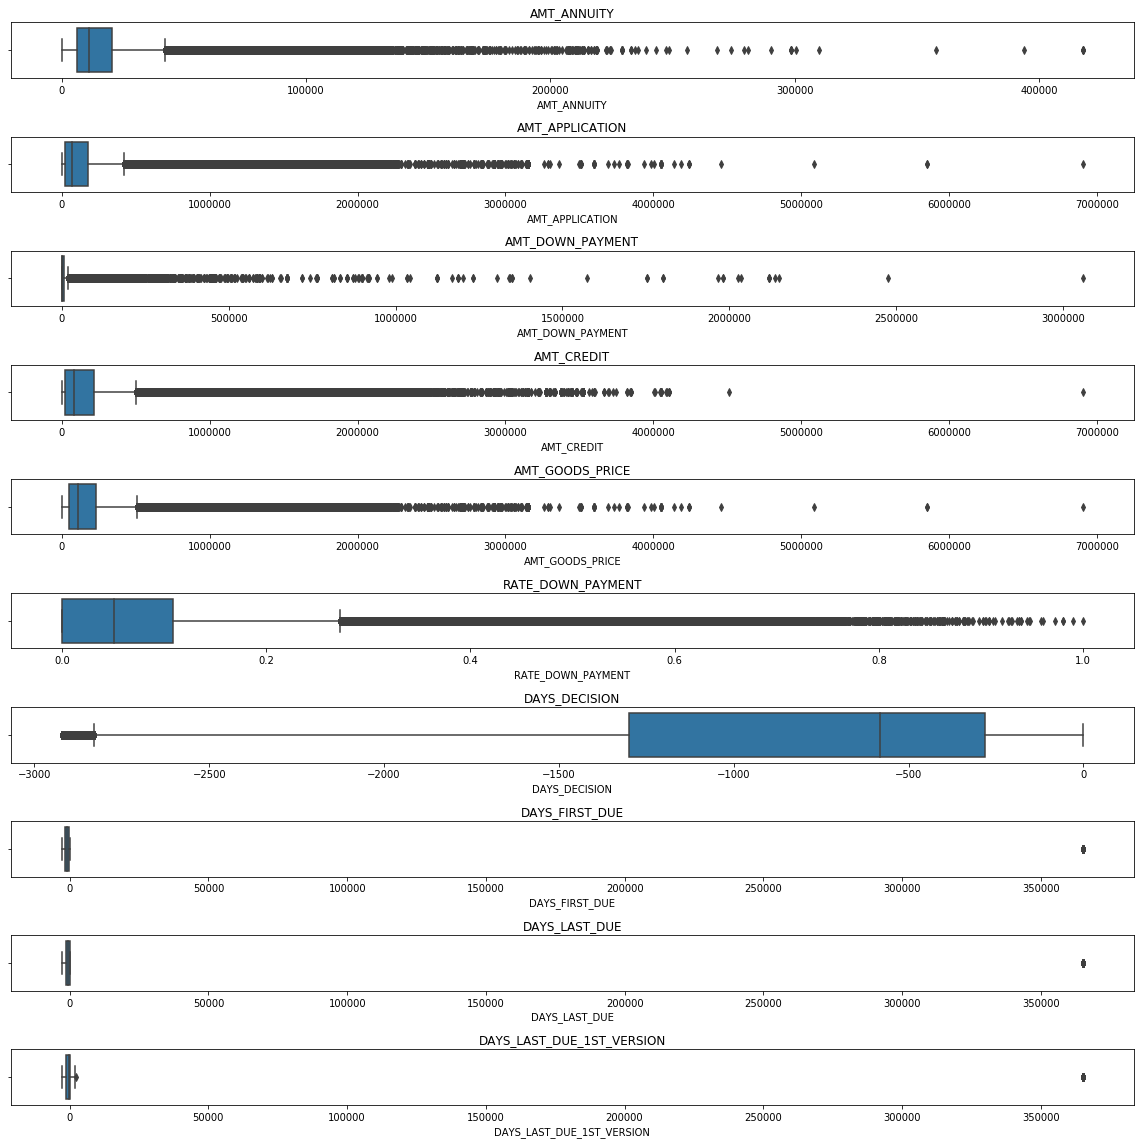

In [19]:
# Loop through Continuous Numerical Variables to Check Outliers
prev_cols_continuous = ['AMT_ANNUITY','AMT_APPLICATION','AMT_DOWN_PAYMENT','AMT_CREDIT','AMT_GOODS_PRICE',
                       'RATE_DOWN_PAYMENT', 'DAYS_DECISION','DAYS_FIRST_DUE',
                       'DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION']
check_outliers_continuous(df_prev_appl, prev_cols_continuous)

In [20]:
#Treating Previous Application Data Outlier
df_prev_appl['DAYS_FIRST_DRAWING'].replace(365243, df_prev_appl['DAYS_FIRST_DRAWING'].median(), inplace= True)

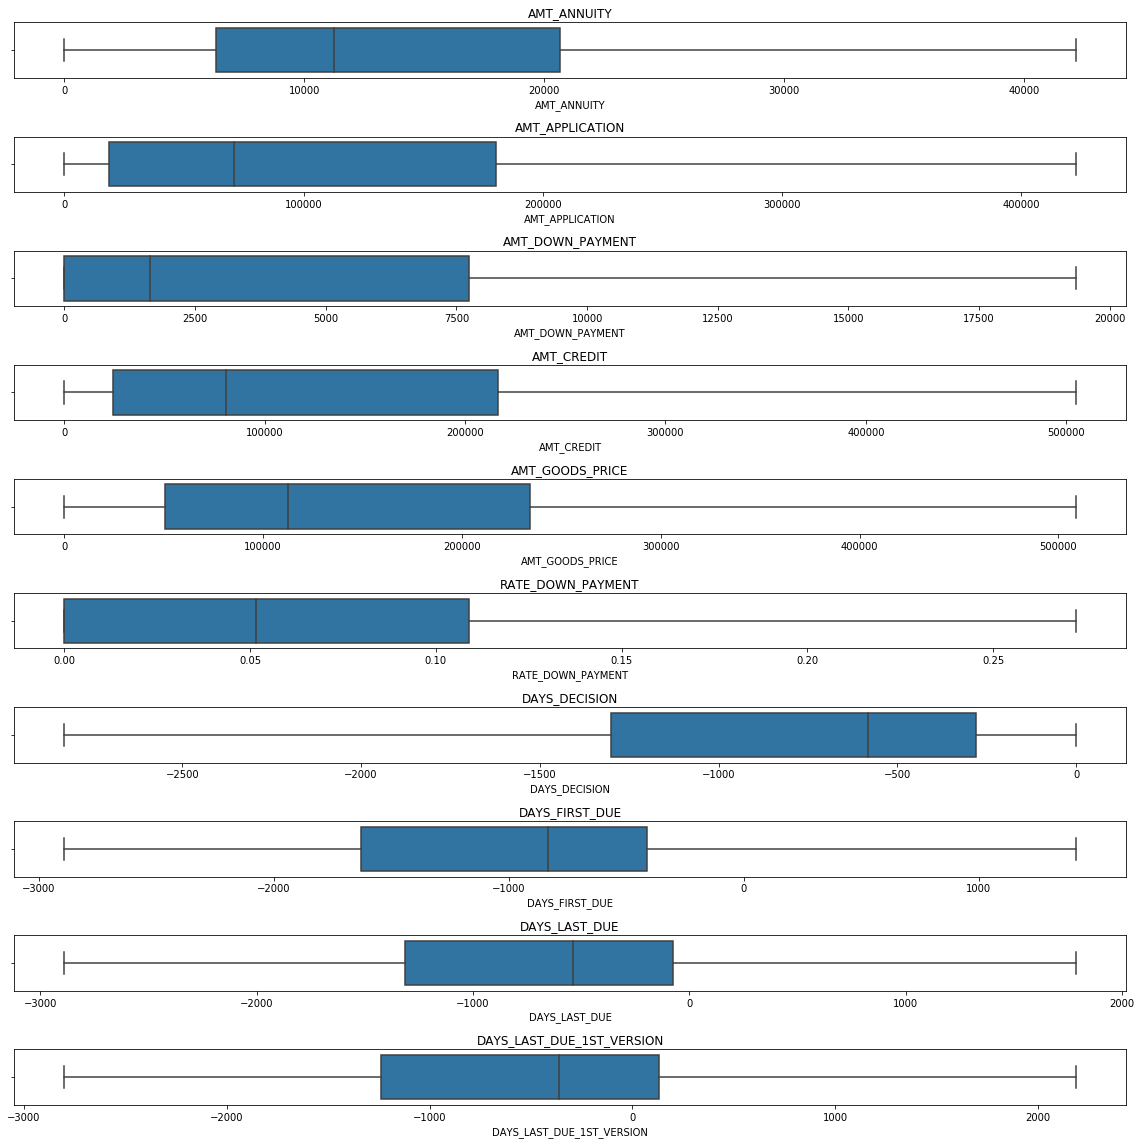

In [21]:
for i in prev_cols_continuous:
    treat_outliers(df_prev_appl, i)

check_outliers_continuous(df_prev_appl, prev_cols_continuous)

<a id="DP-Cardinality"></a>

## 2.6 Data Cardinality

1. ORGANIZATION_TYPE has a high cardinality: 58 distinct values - In order to conduct meaningful analysis we can ignore the values contributing close to 0% in the loan records but marking them as na and not including them while doing categorical analysis OR by only analyzing > 1% frequency types.

In [22]:
#df_appl.loc[df_appl['ORGANIZATION_TYPE'].value_counts() > 1,'ORGANIZATION_TYPE'] 
ser_Org = df_appl['ORGANIZATION_TYPE'].value_counts()/len(df_appl)*100 > 1
list(ser_Org[ser_Org == False].index)
df_appl['ORGANIZATION_TYPE'].replace(list(ser_Org[ser_Org == False].index), np.nan, inplace=True)

<a id="DP-Cleaning"></a>

## 2.7 Data Cleaning

Categorical Variables: Correct the values in categorical columns, found during analysis.<br/>
Values like "unknown" etc. are replaced with NA so that they are ignored during analysis.

In [23]:
# As there are only 4 entries with a gender of XNA. Mark it as blank.
df_appl['CODE_GENDER'].replace('XNA', np.nan, inplace=True)

#In the NAME_FAMILY_STATUS column, there were 2 entries with values of Unknown. Mark it as blank.
df_appl['NAME_FAMILY_STATUS'].replace('Unknown', np.nan, inplace=True)

<a id="DP-Bins"></a>

## 2.8 Bins for Continuous Variables

##### Bins are created under the Data Analysis section. A [custom function](#DA-Uni-Num) for bins has been written where Continuous Numerical Variables are converted to Ordered Categorical Variables for Analysis. 

Please refer to the Data Analysis Section - [Univariate Analysis for Continuous Numerical Variables](#DA-Uni-Num)

<a id="DP-Metrics"></a>

## 2.9 Derived Metrics

#### Data Driven, Type Driven and Business Driven Metrics

In [24]:
# Converting Continuous Variables into Ordered Categorical Variables. Creating Bins for these columns for analysis..

# Converting days to years and removing the - sign.
df_appl['AGE'] = df_appl['DAYS_BIRTH'] / -365
df_appl['EMPLOYMENT_AGE'] = df_appl['DAYS_EMPLOYED'] / -365

Type Driven Interval Category Variable are the creation of Bins as Intervals. These metrics are created later in the analysis

In [25]:
# The proportion of the applicant’s life they have been employed. 
# If a 40 or 50 year-old has only ever been employed for 4 years, they may have trouble repaying their loan.
df_appl['RATIO_EMPLOYMENT_TO_AGE'] = df_appl['EMPLOYMENT_AGE'] / df_appl['AGE']

# The ratio of credit to income. More income than credit is the preferred condition.
df_appl['RATIO_INCOME_TO_CREDIT'] = df_appl['AMT_INCOME_TOTAL'] / df_appl['AMT_CREDIT']

# The ratio of income to annuity. Income compared to Monthly installment. Higher better.
df_appl['RATIO_INCOME_TO_ANNUITY'] = df_appl['AMT_INCOME_TOTAL'] / df_appl['AMT_ANNUITY']

# The ratio of income to annuity scaled by age to capture default conditions
df_appl['RATIO_INCOME_TO_ANNUITY_BY_AGE'] = df_appl['RATIO_INCOME_TO_ANNUITY'] * df_appl['AGE']

# The ratio of credit to annuity. If an applicant has a high level of credit relative to their annuity, 
# they may have trouble repaying their loan.
df_appl['RATIO_CREDIT_TO_ANNUITY'] = df_appl['AMT_CREDIT'] / df_appl['AMT_ANNUITY']

# The ratio of credit to annuity, scaled by age. 
# If a young person doesn’t have much annuity this doesn’t really mean they’re less likely to repay their loan.
df_appl['RATIO_CREDIT_TO_ANNUITY_BY_AGE'] = df_appl['RATIO_CREDIT_TO_ANNUITY'] * df_appl['AGE']
                                                                                         
# Income to Family Size helping determine the expenses and the ability to repay the loan based on current expenses.
df_appl['RATIO_INCOME_TO_FAMSIZE'] = df_appl['AMT_INCOME_TOTAL'] / df_appl['CNT_FAM_MEMBERS']

<b>Note:</b> Not pursuing any modelling based on above derived metrics basis the clarification given by TA. Leaving these metrics as is for future implementations on this.

<a id="DA"></a>

#  3. Data Analysis 

In [106]:
#Create Dataframes for TARGET=0 and TARGET=1 after Data Cleaning
df_appl_T0 = df_appl.query('TARGET == 0')
df_appl_T1 = df_appl.query('TARGET == 1')

#Create Dataframes for Previous Application based on Contract Status
df_prev_appl_approved = df_prev_appl.query('NAME_CONTRACT_STATUS == "Approved"')
df_prev_appl_refused = df_prev_appl.query('NAME_CONTRACT_STATUS == "Refused"')
df_prev_appl_cancelled = df_prev_appl.query('NAME_CONTRACT_STATUS == ["Refused","Unused offer"]')

<a id="DA-Func"></a>

## 3.1 Custom Functions

In [27]:
# Generic Function to plot box plots for Target = 0 and 1. Used for unordered categorical variables.
def plot_box(col, label):
    f,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    f.suptitle("Ordered Categorical Variable - " + label + " Distribution", size=14, y=1.01)
    sns.boxplot(x=df_appl_T0[col], y=df_appl_T0['SK_ID_CURR'], color="lightgreen", ax=ax[0])
    ax[0].title.set_text(label + " Distribution for Target = 0")
    ax[0].set(xlabel=label)
    ax[0].tick_params(axis='x', labelrotation=45)
    ax[0].set(ylabel='Density')

    sns.boxplot(x=df_appl_T1[col], y=df_appl_T1['SK_ID_CURR'], color="lightsalmon", ax=ax[1])
    ax[1].title.set_text(label + " Bins for Target = 1")
    ax[1].set(xlabel=label)
    ax[1].tick_params(axis='x', labelrotation=45)
    ax[1].set(ylabel='Density')
    
    plt.show()

In [28]:
# Generic Function to plot hbar plots for Target = 0 and 1. Used for unordered categorical variables.
def plot_hbar(col,label):
    ser_T0 = np.round((df_appl_T0[col].dropna().value_counts()/len(df_appl_T0[col].dropna()))*100,2)
    ser_T1 = np.round((df_appl_T1[col].dropna().value_counts()/len(df_appl_T1[col].dropna()))*100,2)

    f,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    f.suptitle("Ordered Categorical Variable - " + label + " Distribution", size=14, y=1.01)
               
    plt.box(on=None)
    sns.barplot(x=ser_T0.values, y=ser_T0.index, orient="h", palette=("Blues_d"), ax=ax[0])
    ax[0].title.set_text(label + " Variable Frequency for Target = 0")
    ax[0].set(ylabel=label)
    ax[0].set(xlabel='Frequency')
    ax[0].grid(True, axis="x")
    for i in ax[0].patches:
        ax[0].text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')
    
    plt.box(on=None)
    sns.barplot(x=ser_T1.values, y=ser_T1.index, orient="h", palette=("Blues_d"), ax=ax[1])
    ax[1].title.set_text(label + " Variable Frequency for Target = 1")
    ax[1].set(ylabel=label)
    ax[1].set(xlabel='Frequency')
    ax[1].grid(True, axis="x")
    for i in ax[1].patches:
        ax[1].text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [29]:
# Procedure to deduce the frequency of a column in dataframe and to plot percentage and frequency distribution
# col - name of column on which analysis is to be performed
# label - Label name for column
def unordered_categorical_univariate_analysis(col, label):
    plot_hbar(col, label)
    plot_box(col, label)
    

In [127]:
def segmented_univariate_analysis_previous(col, label):
    ser_approved = np.round((df_prev_appl_approved[col].dropna().value_counts()/len(df_prev_appl_approved[col].dropna()))*100,2)
    ser_rejected = np.round((df_prev_appl_refused[col].dropna().value_counts()/len(df_prev_appl_refused[col].dropna()))*100,2)
    ser_cancelled = np.round((df_prev_appl_cancelled[col].dropna().value_counts()/len(df_prev_appl_cancelled[col].dropna()))*100,2)
    
    f,ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
    f.suptitle(label + " Distribution of Previous Application", size=14, y=1.01)
    
    def plot_graph(ser, axlabel, label, ax):
        sns.barplot(x=ser.values, y=ser.index, orient="h", palette=("Blues_d"), ax=ax)
        ax.title.set_text(axlabel)
        ax.set(ylabel=label)
        ax.set(xlabel='Frequency %')
        ax.grid(True, axis="x")
        for i in ax.patches:
            ax.text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')
    
    plot_graph(ser_approved, "Approved Application", label, ax[0])
    plot_graph(ser_rejected, "Rejected Application", label, ax[1])
    plot_graph(ser_cancelled, "Cancelled Application", label, ax[2])
    plt.tight_layout()
    plt.show()

In [30]:
# Plotting BINS
def plot_bar(ser_T0, ser_T1, label):
    f,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    f.suptitle("Ordered Categorical Variable (BINS) - " + label + " Distribution", size=14, y=1.01)
    sns.barplot(x=ser_T0.index, y=ser_T0.values, color="green", ax=ax[0])
    ax[0].title.set_text(label + " Bins for Target = 0")
    ax[0].set(xlabel=label + " Bins")
    ax[0].tick_params(axis='x', labelrotation=45)
    ax[0].set(ylabel='Frequency')
    for i in ax[0].patches:
        if (i.get_height() != 0):
            ax[0].text(i.get_x()+0.20, i.get_y() + i.get_height()+0.15, str(int(i.get_height())) + "%", fontsize=12, color='black')


    sns.barplot(x=ser_T1.index, y=ser_T1.values, color="red", ax=ax[1])
    ax[1].title.set_text(label + " Bins for Target = 1")
    ax[1].set(xlabel=label + " Bins")
    ax[1].tick_params(axis='x', labelrotation=45)
    ax[1].set(ylabel='Frequency')
    for i in ax[1].patches:
        if (i.get_height() != 0):
            ax[1].text(i.get_x()+0.20, i.get_y() + i.get_height()+0.15, str(int(i.get_height())) + "%", fontsize=12, color='black')

    plt.show()

# Function to Create Bins and Plot
def plot_bins_univariate_analysis(col, label):
    # Create bins on the main dataframe so that the BINS for both Target 0 and 1 are same.
    bins_main = pd.cut(df_appl[col], 10, precision = 0).value_counts().sort_index().index
    bins_lst = []
    for i in bins_main.tolist():
        bins_lst.append((i.left, i.right))
    bins = pd.IntervalIndex.from_tuples(bins_lst)
    
    # Target = 0 Bins
    bins_T0 = pd.cut(df_appl_T0[col].dropna(), bins, 10, precision=0)
    bins_T0 = np.round((bins_T0.value_counts().sort_index()/len(bins_T0.dropna()))*100,2)

    # Target = 1 Bins
    bins_T1 = pd.cut(df_appl_T1[col].dropna(), bins, 10, precision=0)
    bins_T1 = np.round((bins_T1.value_counts().sort_index()/len(bins_T1.dropna()))*100,2)
    
    plot_bar(bins_T0, bins_T1, label)
    



In [31]:
def dist_continuous_numeric_univariate_analysis(col, label):
    # Cut the window in 2 parts
    f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 5), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    f.suptitle("Continuous Numeric Variable - " + label + " Distribution", size=14, y=1.01) 
    # Add a graph in each part
    sns.boxplot(df_appl_T0[col].dropna(), color="lightgreen", ax=ax1)
    sns.distplot(df_appl_T0[col].dropna(), color="green", ax=ax3)
    ax1.title.set_text(label + " for Target = 0")
    ax3.set(xlabel=label)
    ax3.set(ylabel='Density')
    # Remove x axis name for the boxplot
    ax1.set(xlabel='')

    # Add a graph in each part
    sns.boxplot(df_appl_T1[col].dropna(), color="lightsalmon", ax=ax2)
    sns.distplot(df_appl_T1[col].dropna(), color="red", ax=ax4)
    ax2.title.set_text(label + " for Target = 1")
    ax4.set(xlabel=label)
    ax4.set(ylabel='Density')
    # Remove x axis name for the boxplot
    ax2.set(xlabel='')
    plt.tight_layout()
    plt.show()

In [32]:
def age_dist(col, label):
    fig = plt.figure(figsize=(16,5))
    sns.distplot(df_appl[col].dropna(), color="blue")
    sns.distplot(df_appl_T0[col].dropna(), color="gold")
    sns.distplot(df_appl_T1[col].dropna(), color="red")
    fig.legend(['All','0','1'], loc=5, ncol=1)
    plt.title("Applicant's " + label + " Distribution")
    plt.xlabel(label)
    plt.ylabel("Density")
    plt.show()

In [158]:
def num_univariate_anaysis_prev(col, label):
    fig = plt.figure(figsize=(14,5))
    sns.kdeplot(df_prev_appl_approved[col].dropna(), label="Approved", color="green")
    sns.kdeplot(df_prev_appl_refused[col].dropna(), label="Rejected", color="red")
    sns.kdeplot(df_prev_appl_cancelled[col].dropna(), label="Cancelled", color="blue")
    #fig.legend(['Approved','Rejected','Cancelled'], loc=5, ncol=1)
    plt.title(label + " Distribution of Previous Application by Contract status")
    plt.xlabel(label)
    plt.ylabel("Density")
    plt.show()

<a id="DA-Imbalance"></a>

## 3.2 Data Imbalance

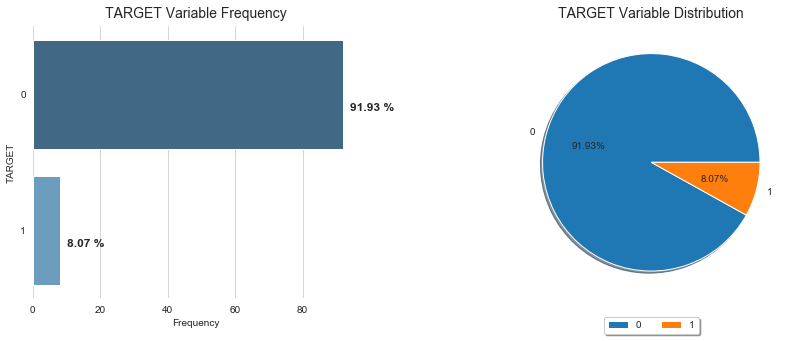

In [33]:
ser_Target = np.round((df_appl["TARGET"].dropna().value_counts()/len(df_appl["TARGET"]))*100,2)

plt.figure(figsize=(14,5))
sns.set_style("whitegrid")
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.box(on=None)
ax1 = sns.barplot(x=ser_Target.values, y=ser_Target.index, orient="h", palette=("Blues_d"))
plt.title("TARGET Variable Frequency", size=14, y=1.01)
plt.ylabel("TARGET")
plt.xlabel("Frequency")
ax1.grid(True, axis="x")
for i in ax1.patches:
    ax1.text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')
    
plt.subplot(grid[0, 1])
plt.pie(ser_Target.values, labels=ser_Target.index, autopct='%1.2f%%',shadow=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
ax = plt.title("TARGET Variable Distribution", size=14, y=1.01)

####   TARGET Variable - Pattern & Inference 
1. Majority of the <b>customers (91.93%)</b> did not have issues in paying the loan or installment.
2. About <b>8.07% customers</b> had issues in repayment of loans or installments and were defaulters

<b><font color="orange">Data Imbalance = 91.93/8.07 = 11.39% </b>

<a id="DA-Uni"></a>

## 3.3 Univariate Analysis for Categorical Variables
Analysis for Ordered and Unordered Categorical Variables

##### Application Data

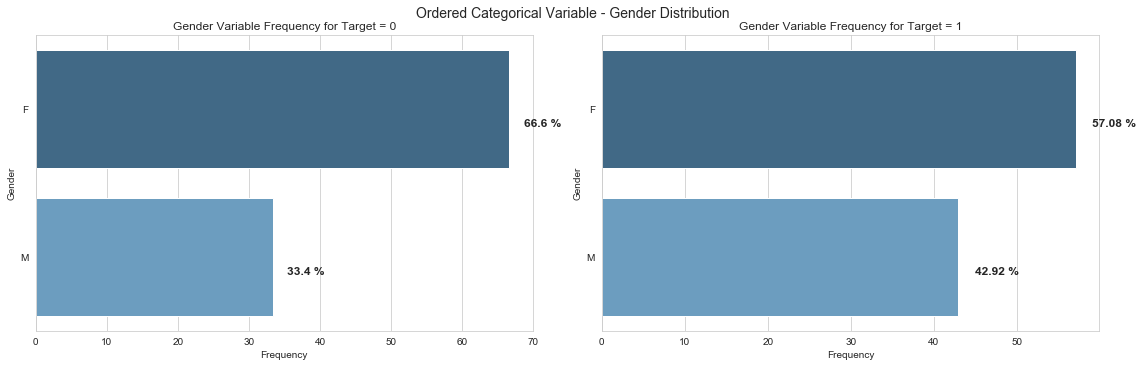

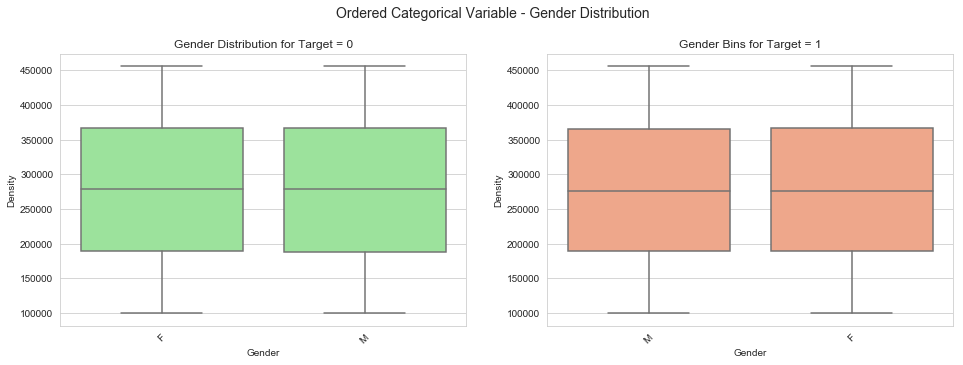

In [34]:
unordered_categorical_univariate_analysis("CODE_GENDER", "Gender")

####   Gender Variable - Pattern & Inference 
1. <b>65.85% customers are Females</b> whereas approximately half of it <b>34.16% are males</b> of total loan applicants.
2. 42.9% Male Loan applicants defaulted in loan repayment which is higher in comparison to the total male applicants.
3. Females have 57.1% loan repayment issues

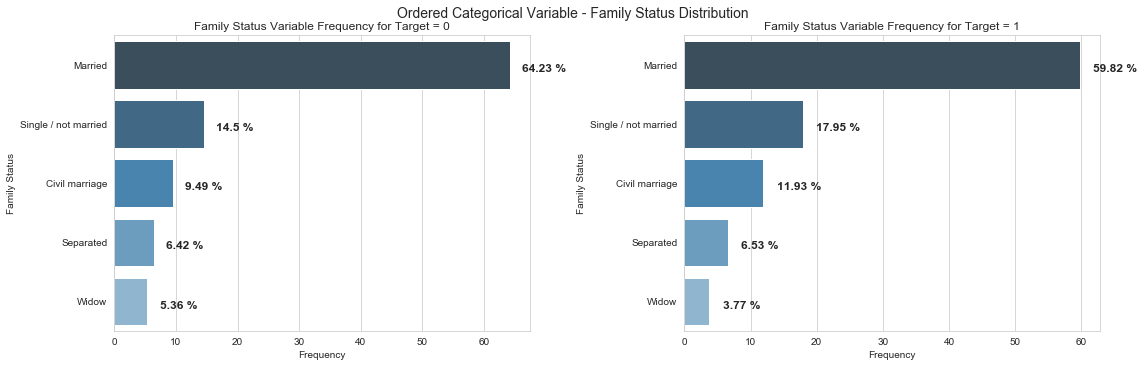

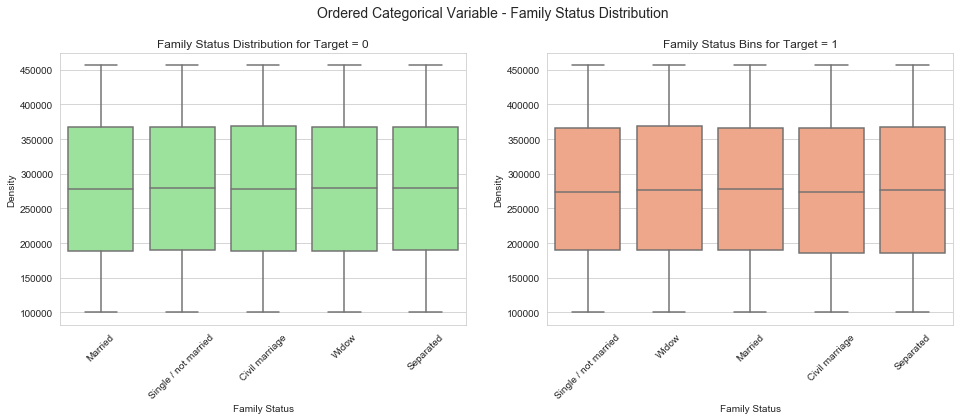

In [35]:
unordered_categorical_univariate_analysis("NAME_FAMILY_STATUS", "Family Status")

####   Family Status Variable - Pattern & Inference 
1. Married Family Status has the highest loan applicants at 63.88%
2. Married Family Status also has the highest loan repayment defaults and also the highest timely loan repayment.
3. Single / not Married and Civil Marriage Family Status applicants seem to default more in loan repayment.

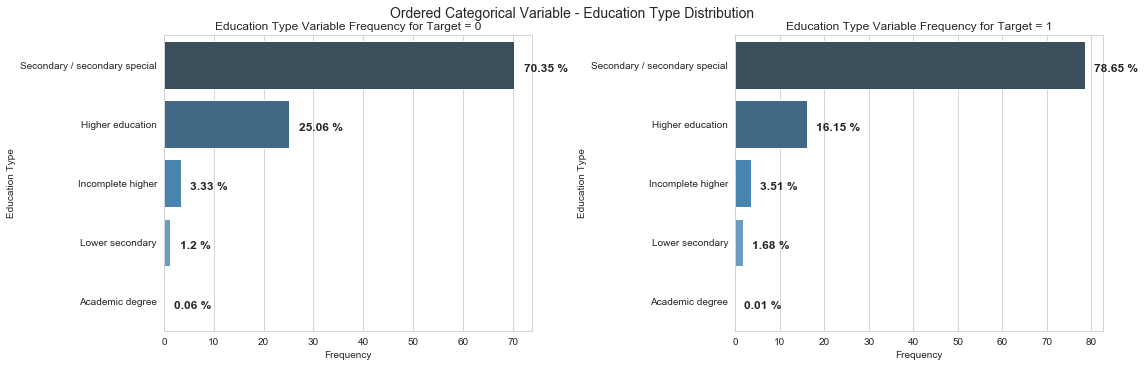

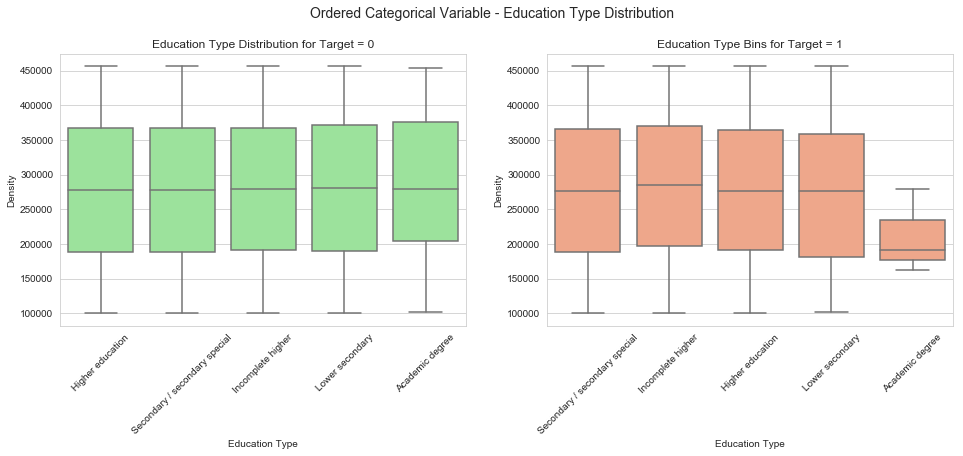

In [36]:
unordered_categorical_univariate_analysis("NAME_EDUCATION_TYPE", "Education Type")

####   Education Type Variable - Pattern & Inference 
1. Secondary / Secondary Special Education Type has the highest loan applications. It also has the higest repayment issue.
2. Customers having Higher Education seem to have lower defaulting issues.
3. Customers having Higher Education have less demand for cash loans and hence are lower in loan applicants count.
4. The academic degree box plot indicates lower quartiles in comparison to the other. Suggesting they Academic degree has least defaulted in loan repayment.

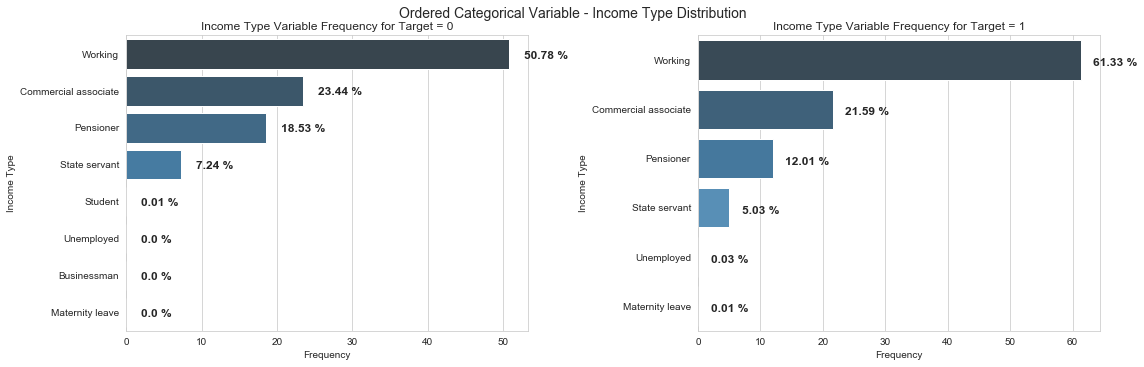

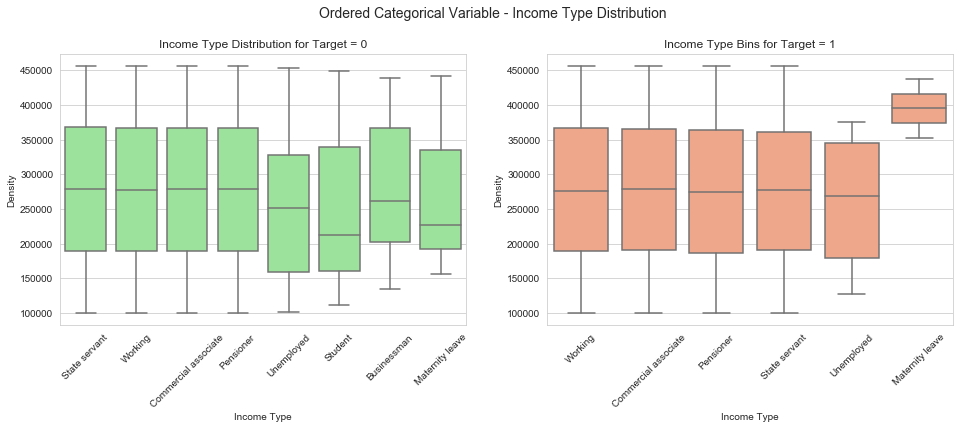

In [37]:
unordered_categorical_univariate_analysis("NAME_INCOME_TYPE", "Income Type")

####   Income Type Variable  - Pattern & Inference 
1. Working Income Type has highest loan applications and highest defaulting issue. 61.3% repayment issues with the Working Income Type is higher in comparison to the loan applicants. There needs to be careful consideration of other parameters on Working Class loans.
2. Pensioner and State servant Income Types seem to have lower defaulting issues. It is a positive to grant loan to these Working Class. It carries lesser risk.
3. Unemployed, Businessman, Students and Applicants on Maternity Leave are not sanctioned any loans.

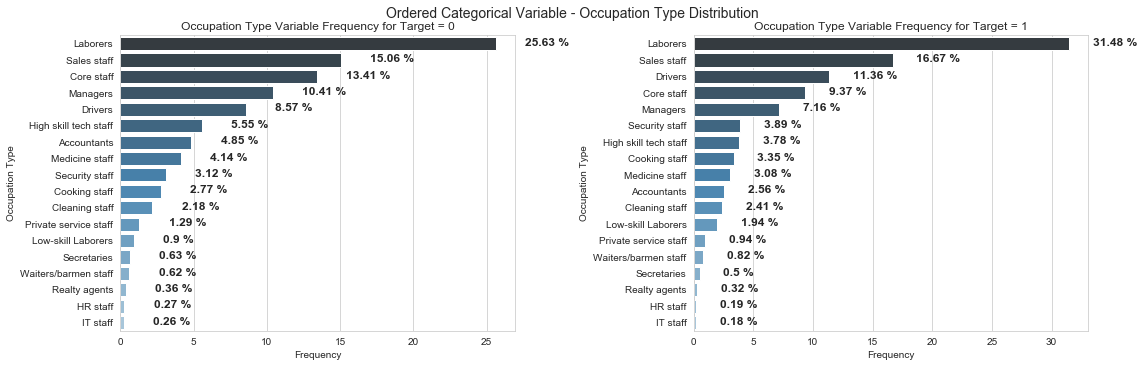

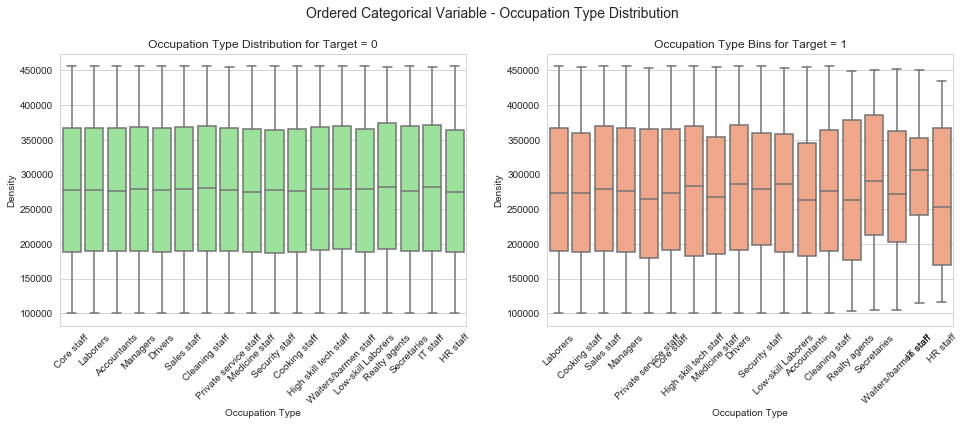

In [38]:
unordered_categorical_univariate_analysis("OCCUPATION_TYPE", "Occupation Type")

####   Occupation Type Variable Variable - Pattern & Inference 
1. Labourers have 17.95% loan applicants in total. <b>23.5% labourers have defaulted</b> in loan payments. Precaution needs to be taken while granting loan to this Occupation Type.

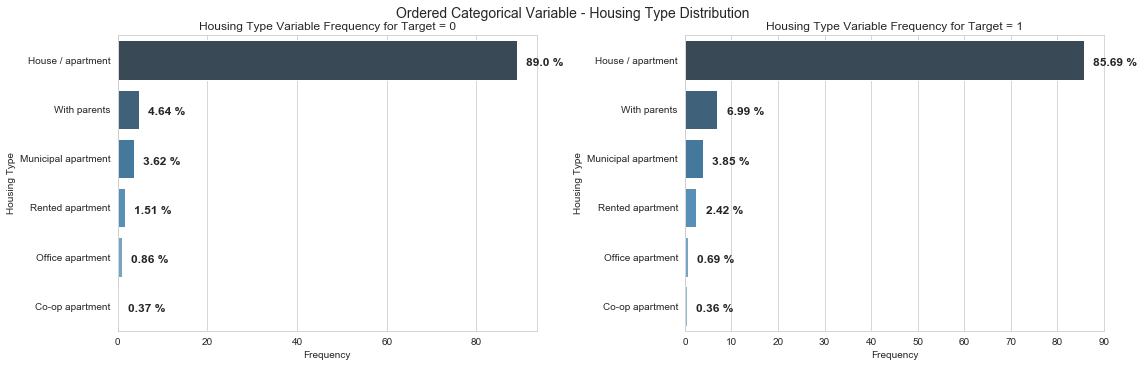

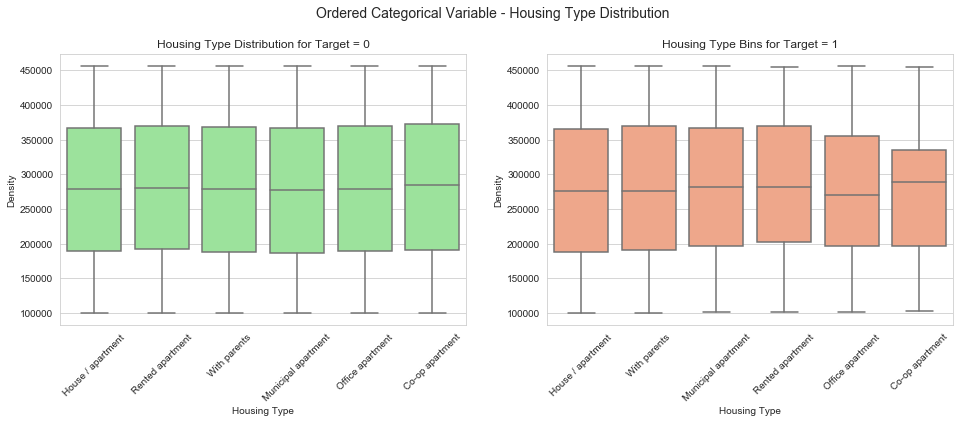

In [39]:
unordered_categorical_univariate_analysis("NAME_HOUSING_TYPE", "Housing Type")

####   Name Housing Type Variable Variable - Pattern & Inference 
1. Data is imbalanced towards House / Apartment Housing Type applicants with 88.73% loan applicants.
2. The applicants having Housing Type as "With Parents" have struggled to pay up the loan. It is because these applicants may not be independent yet. Other variables impact needs to be analysed before granting loan to this category. Precaution needs to be taken.



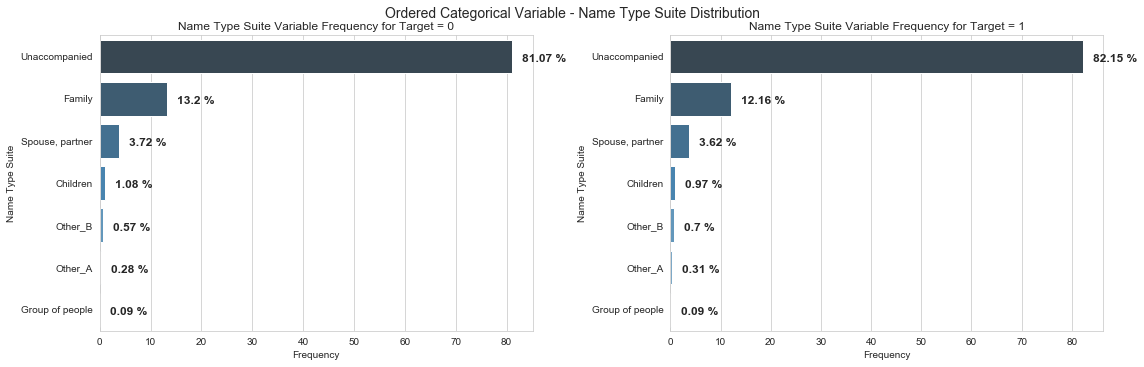

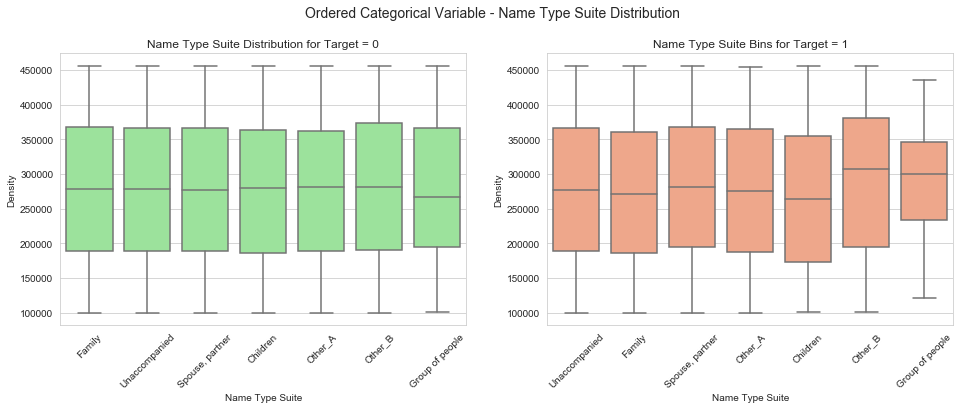

In [40]:
unordered_categorical_univariate_analysis("NAME_TYPE_SUITE", "Name Type Suite")

####   Name Type Suite Variable Variable - Pattern & Inference 
1. Typically applicants are unaccompanied.
2. Applicants being accompanied by Family, Spouse or Children seem to have a little lower default ratio.

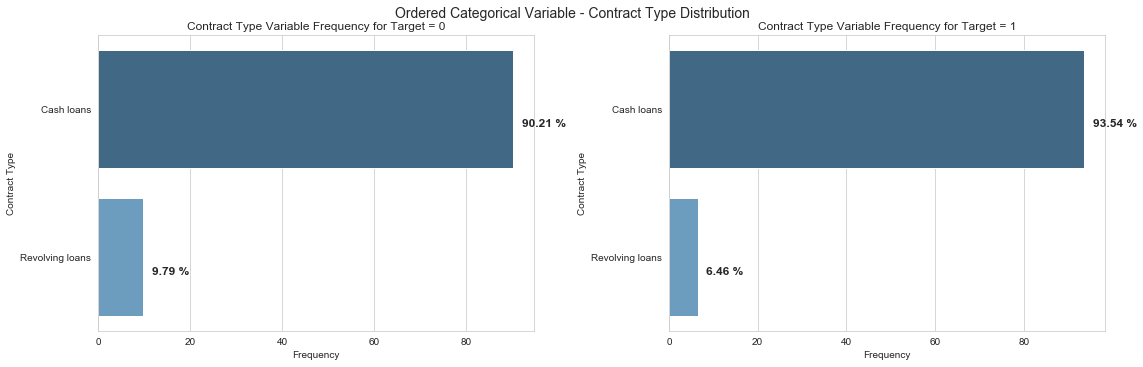

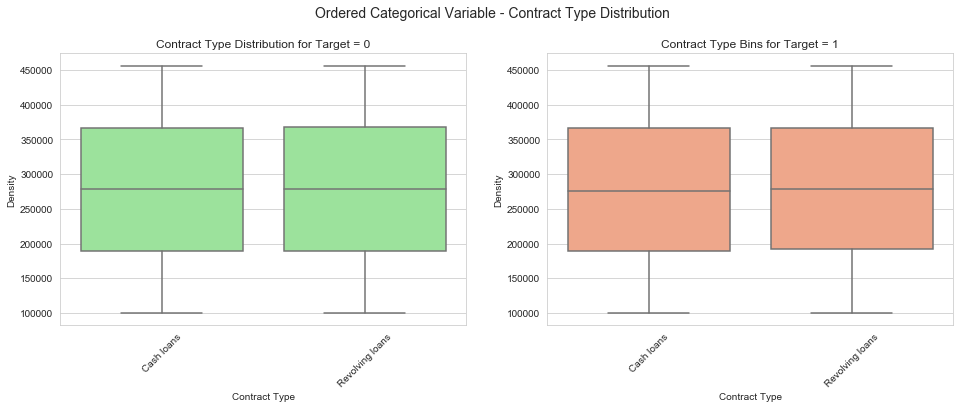

In [41]:
unordered_categorical_univariate_analysis("NAME_CONTRACT_TYPE", "Contract Type")

####   Contract Type Variable - Pattern & Inference 
1. Data is imbalanced with Cash Loans having 90.48% loan applicants in comparison to 9.52% for Revolving Loans.
2. Revolving Loans have lower defaulting ratio in comparison to the Cash Loan.

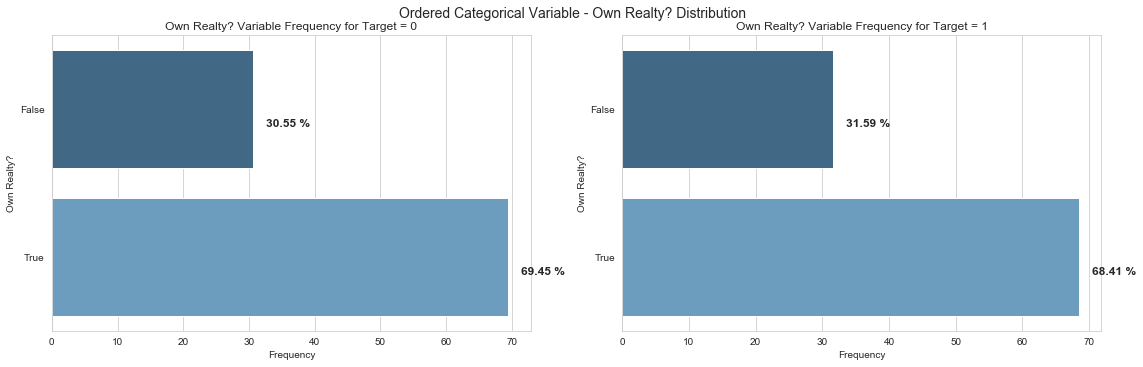

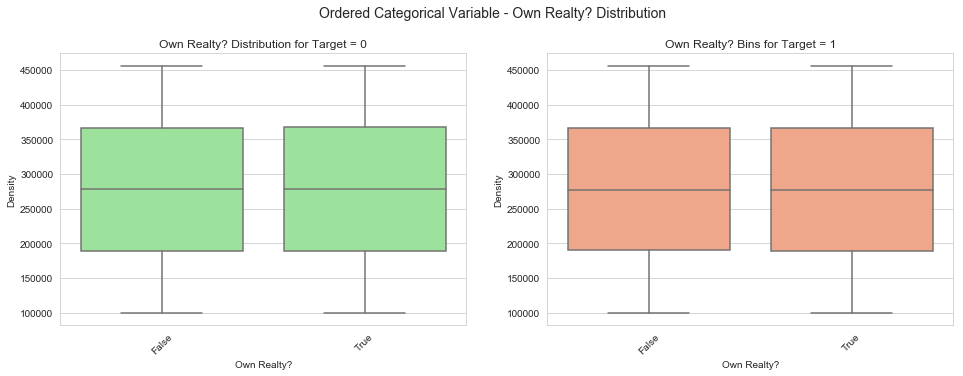

In [42]:
unordered_categorical_univariate_analysis("FLAG_OWN_REALTY", "Own Realty?")

####   Own Realty - Pattern & Inference 
1. Applicants having their own realty have a loan repayment ratio marginally better than the ones who don't

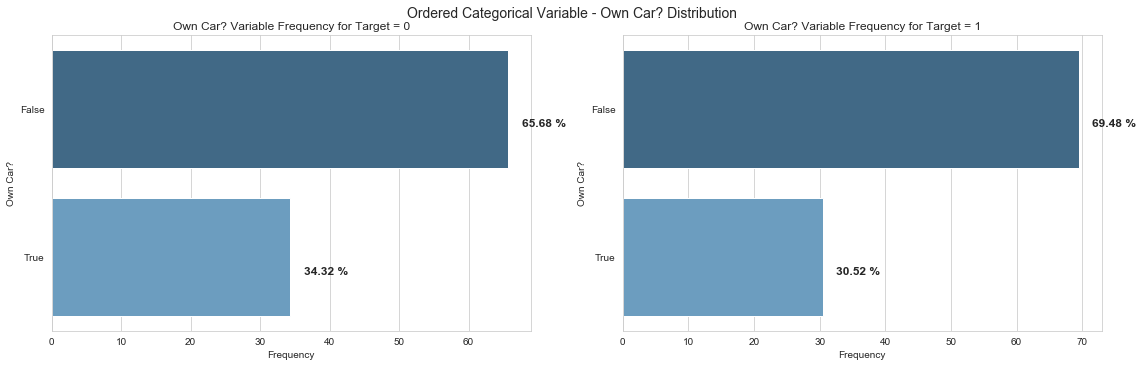

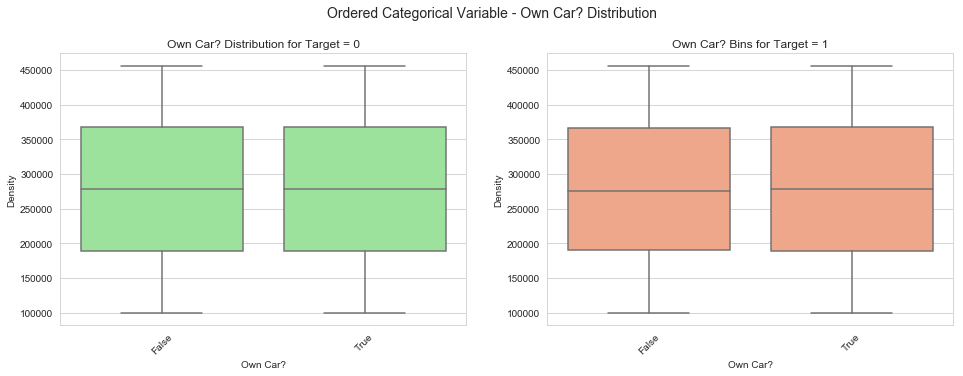

In [43]:
unordered_categorical_univariate_analysis("FLAG_OWN_CAR", "Own Car?")

####   Own Car Variable - Pattern & Inference 
1. Applicant not having a car defaults more in repayment in comparison to the applicant who owns a car.

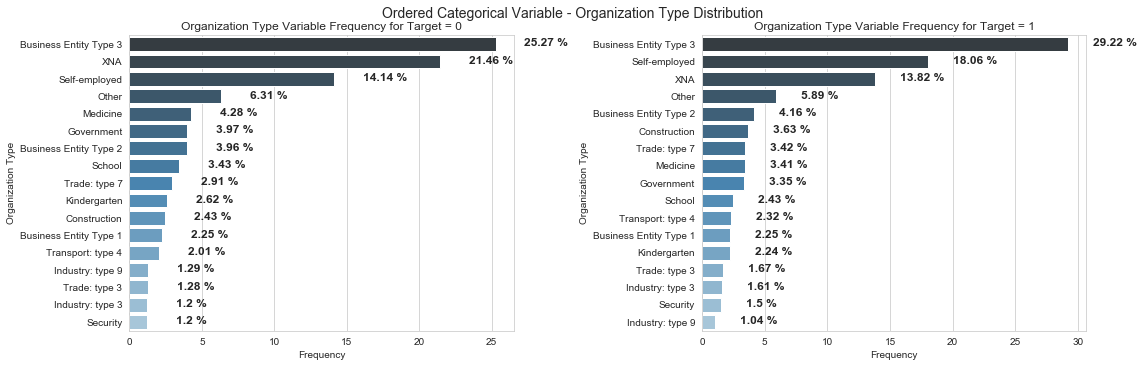

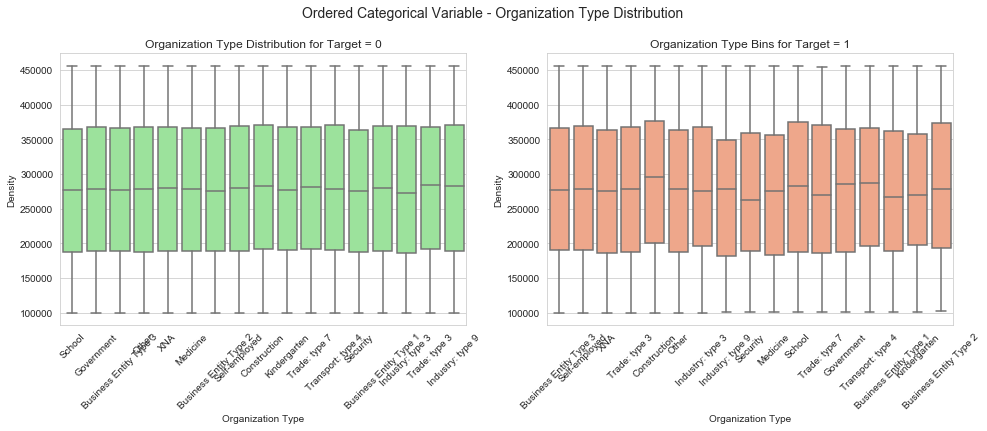

In [44]:
unordered_categorical_univariate_analysis("ORGANIZATION_TYPE", "Organization Type")

####   Organization Type Variable - Pattern & Inference 
1. Business Type Entity 3 are the top loan applicants and also default repayment more than paying on time. 
2. XNA Organization Type have a lower loan default ratio. This should be a preferred Organization Type for granting loan.
3. Self Employed Organization Type default more on the repayment. Additonal paramater must be validated for Self Employed Applicants and extra caution should be taken.

##### Previous Application Data

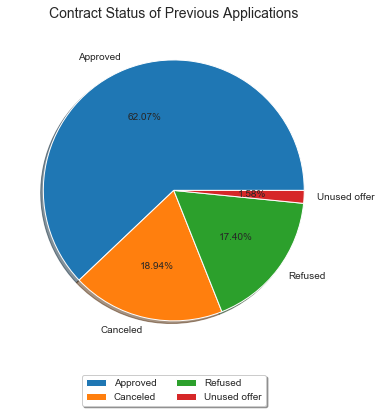

In [120]:
# Contract Status of Previous Application
ser_prev_ContractStatus = df_prev_appl['NAME_CONTRACT_STATUS'].value_counts()
plt.figure(figsize=(7,6))
plt.pie(ser_prev_ContractStatus.values, labels=ser_prev_ContractStatus.index, autopct='%1.2f%%',shadow=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.title("Contract Status of Previous Applications", size=14, y=1.01)
plt.show()

####   Contract Status of Previous Application - Pattern & Inference 
1. 62% of previous loan applications were approved.
2. 17% of previous loan application were rejected by the company.
3. 21% of previous loan application were cancelled by the client.

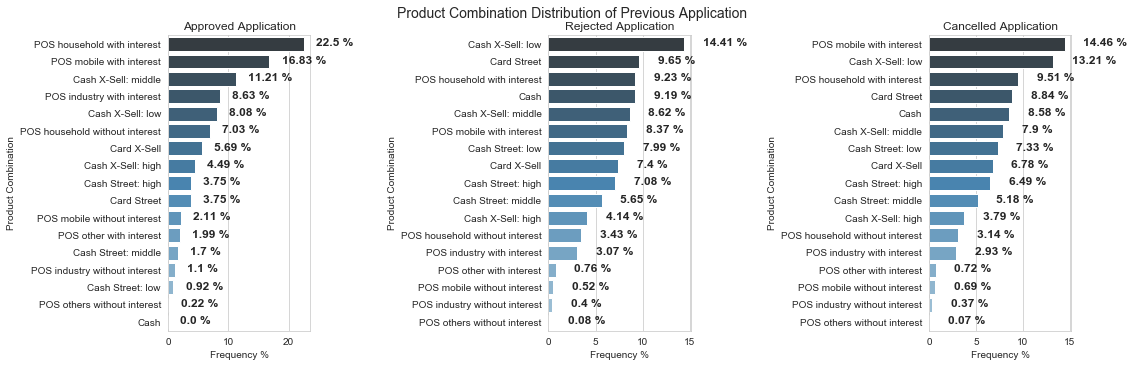

In [128]:
segmented_univariate_analysis_previous('PRODUCT_COMBINATION','Product Combination')

####   Product Combination Variable of Previous Application - Pattern & Inference 
1. POS household with interest product combination had the highest number of approved loan applications
2. Cash X-Sell:low product combination seems to be the combination which is getting mostly rejected and cancelled. The company should analyze the cause.
3. Cash Product Combination has the lowest Approved Applications.

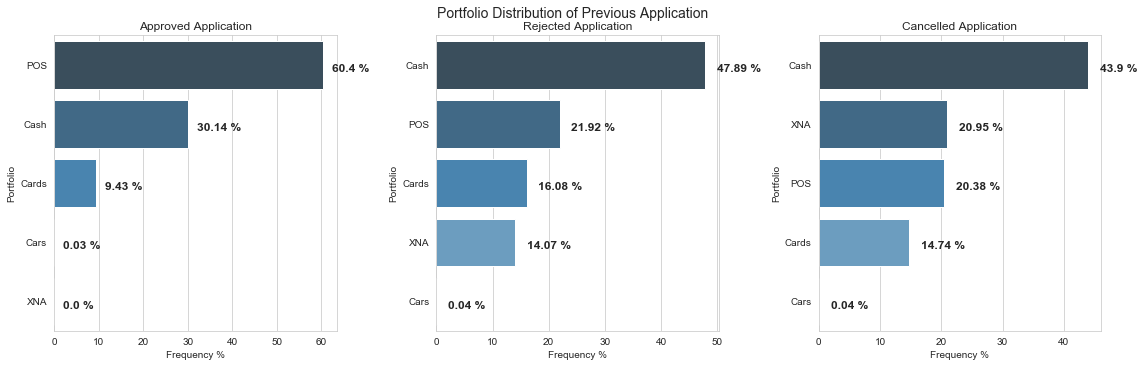

In [129]:
segmented_univariate_analysis_previous('NAME_PORTFOLIO','Portfolio')

####   Portfolio Variable of Previous Application - Pattern & Inference 
1. Portfolio - POS has highest approved application and has less cancellations and rejections. This seems to be a good portfolio.
2. Portfolio - Cash has highest rejections by company as well as highest cancellations by client. Analysis is needed on this portfolio to understand the reasons.

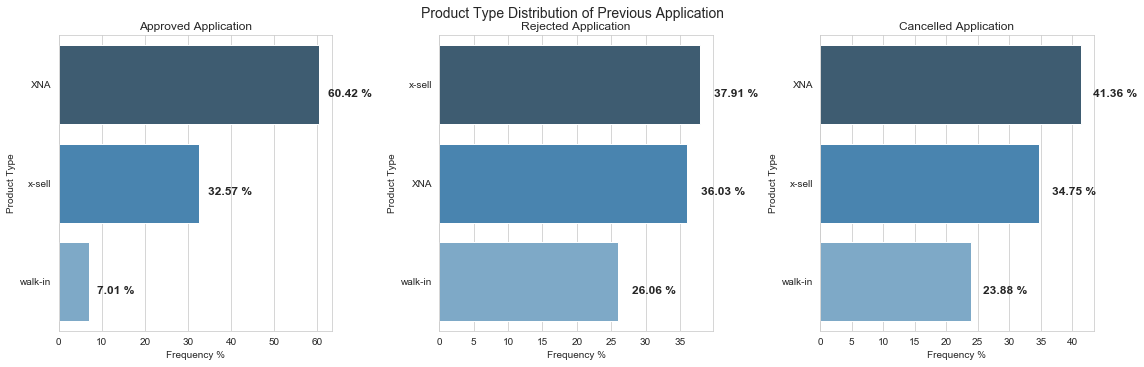

In [130]:
segmented_univariate_analysis_previous('NAME_PRODUCT_TYPE','Product Type')

####   Product Type Variable of Previous Application - Pattern & Inference 
1. Product Type - XNA has the highest Approved Applications as well as highest cancellation by client.
2. Product Type - x-sell has the highest Rejected Applications. Quality needs to be improved for this.
3. Product Type - walk-in has the lowest Approved, Rejected and Cancelled Applications.

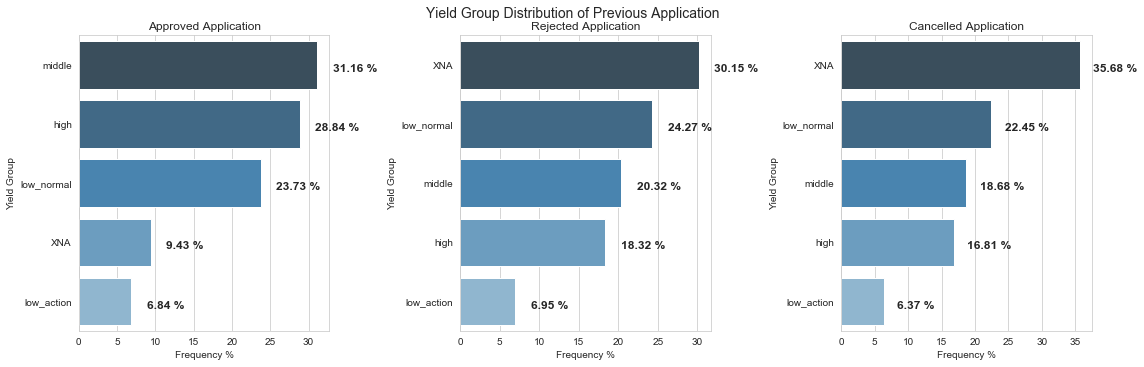

In [131]:
segmented_univariate_analysis_previous('NAME_YIELD_GROUP','Yield Group')

####   Yield Group Type Variable of Previous Application - Pattern & Inference 
1. Grouped Interest Rate of middle followed by high has high approved loan application cases.
2. XNA grouped interest Rate is the biggest reason for Rejected and Cancelled loan applications.

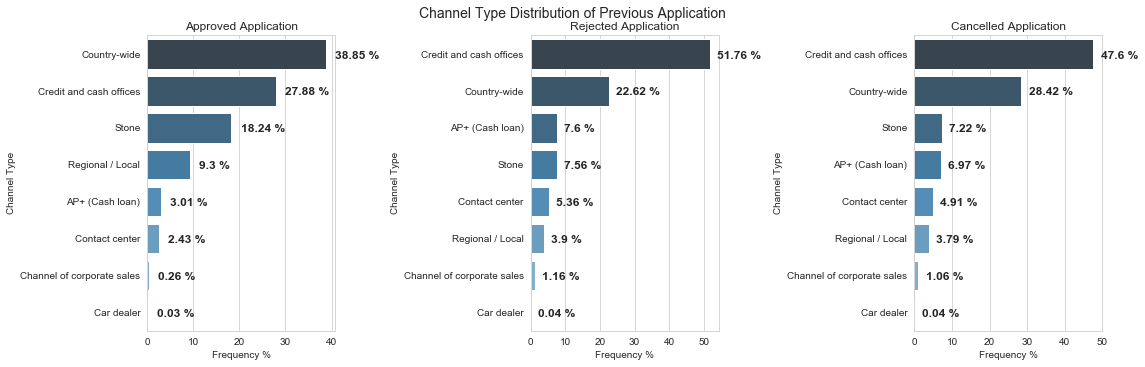

In [132]:
segmented_univariate_analysis_previous('CHANNEL_TYPE','Channel Type')

####   Channel Type Variable of Previous Application - Pattern & Inference 
1. Country-wide Channel Type has highest approved loan applications.
2. Credit and cash offices Channel Type has 50% loan application rejection and cancellation.

<a id="DA-Uni-Num"></a>

## 3.4 Univariate Analysis for Numerical Variables

#### Applicant Age and Employment Age - Analysis
DAYS_BIRTH and EMPLOYED_DAYS were Continuous Numerical Variables which were converted into Ordered Categorical Variables for better analysis.

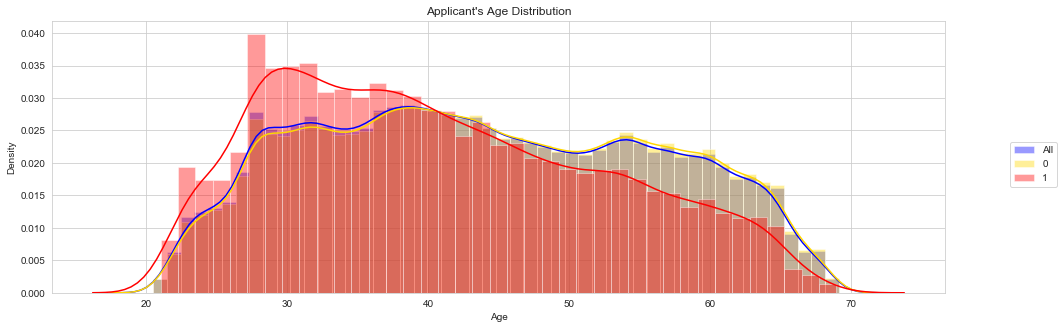

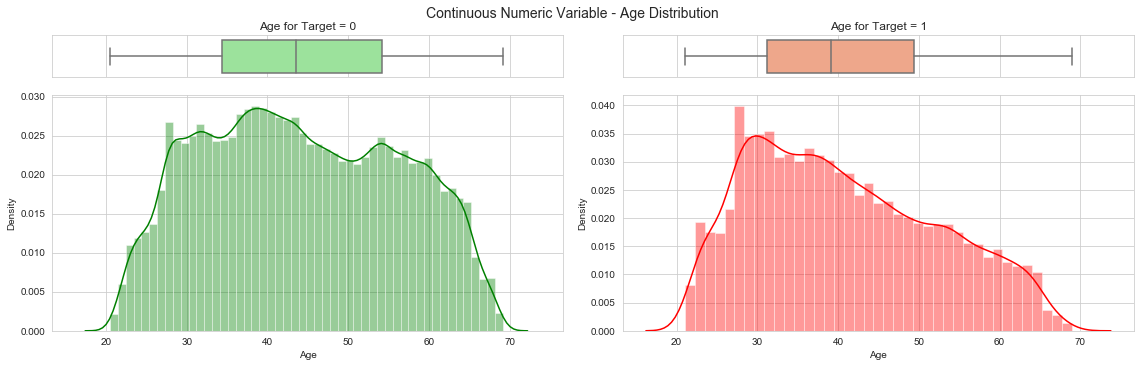

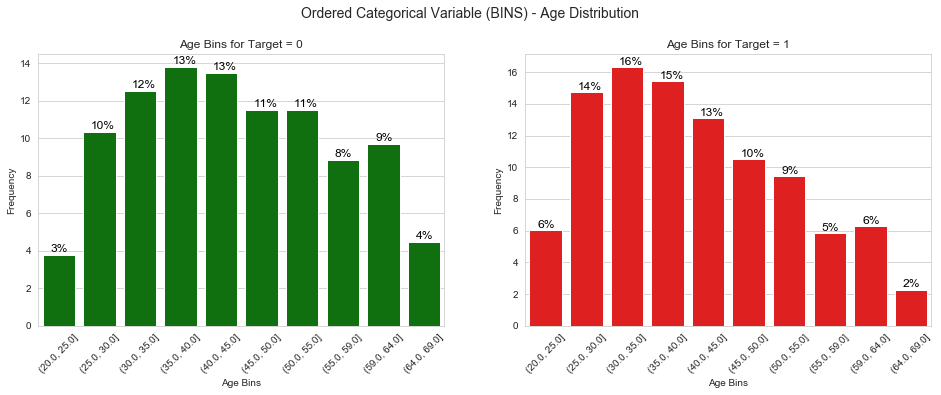

In [45]:
age_dist("AGE","Age")
dist_continuous_numeric_univariate_analysis("AGE", "Age")
plot_bins_univariate_analysis("AGE", "Age")

####   Applicant's Age Variable - Pattern & Inference 
1. There is skewness for Younger Age Applicants for Target = 1. The repayment of loan defaulters are higher in Younger Age Group of 20 - 40 years. Precautions need to be taken while granting them loans.
2. Other impact parameters need to be analysed before granting younger age group loans. Like stability considering, Family Status, Employment, Income etc.
3. The older age group of 55 to 69 years have less loan default issues.

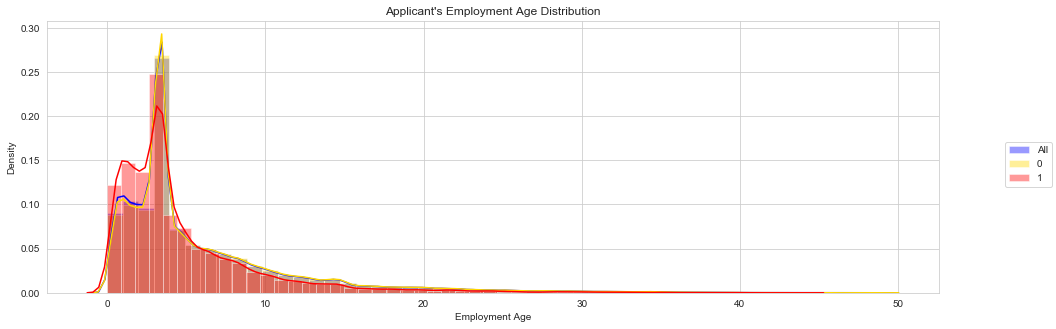

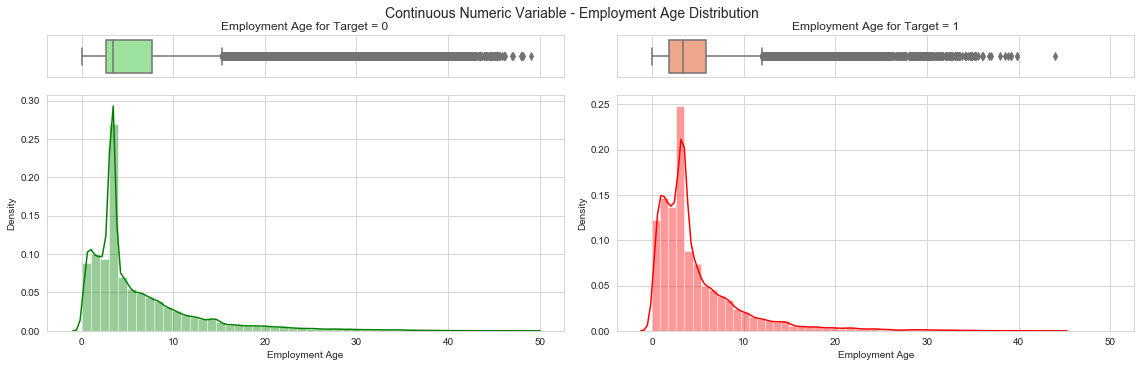

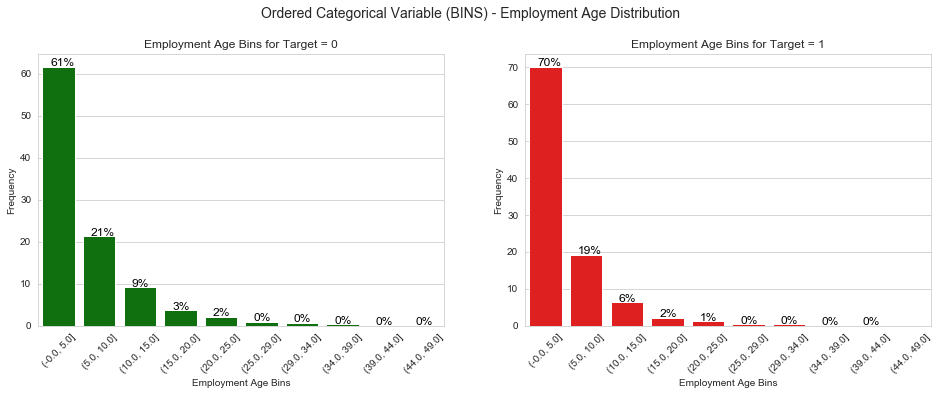

In [46]:
age_dist("EMPLOYMENT_AGE","Employment Age")
dist_continuous_numeric_univariate_analysis("EMPLOYMENT_AGE", "Employment Age")
plot_bins_univariate_analysis("EMPLOYMENT_AGE", "Employment Age")

####   Applicant's Employment Age Variable - Pattern & Inference 
1. Employment Age of 0 to 5 years has the maximum loan defaulting cases. Precaution needs to be taken while granting loans to this age grooup.
2. Employment Age more than 5 years has lower loan default rate.

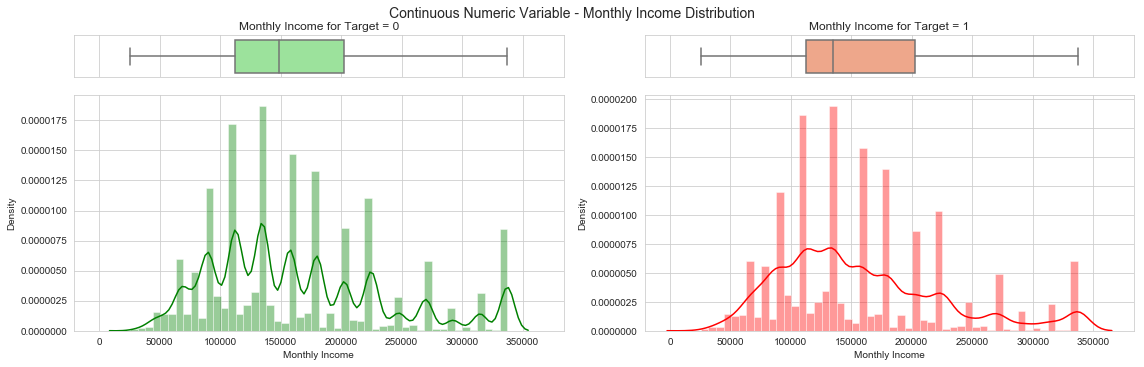

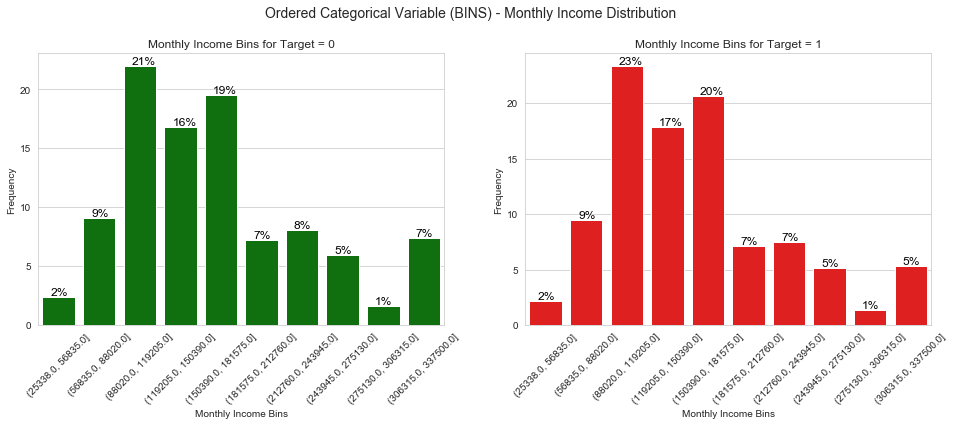

In [47]:
dist_continuous_numeric_univariate_analysis("AMT_INCOME_TOTAL", "Monthly Income")
plot_bins_univariate_analysis("AMT_INCOME_TOTAL", "Monthly Income")

####   Monthly Income Variable - Pattern & Inference 
1. Income group of 88000 to 150390 tend to default on the loan repayment

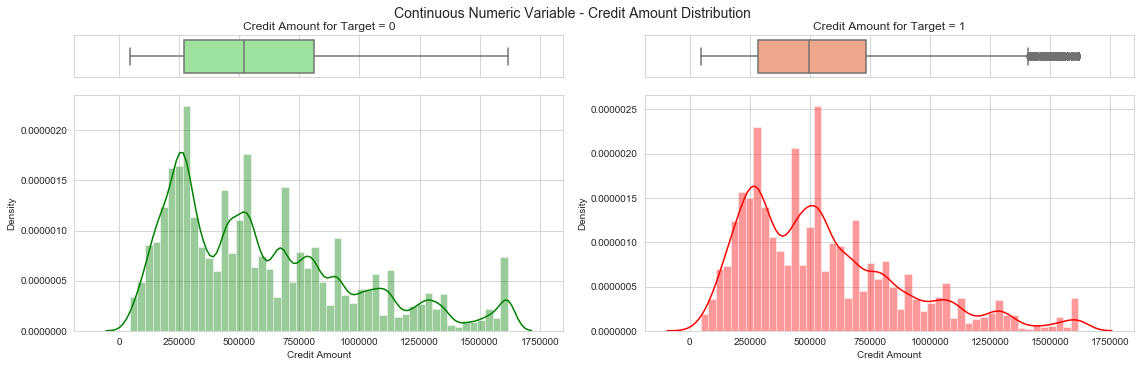

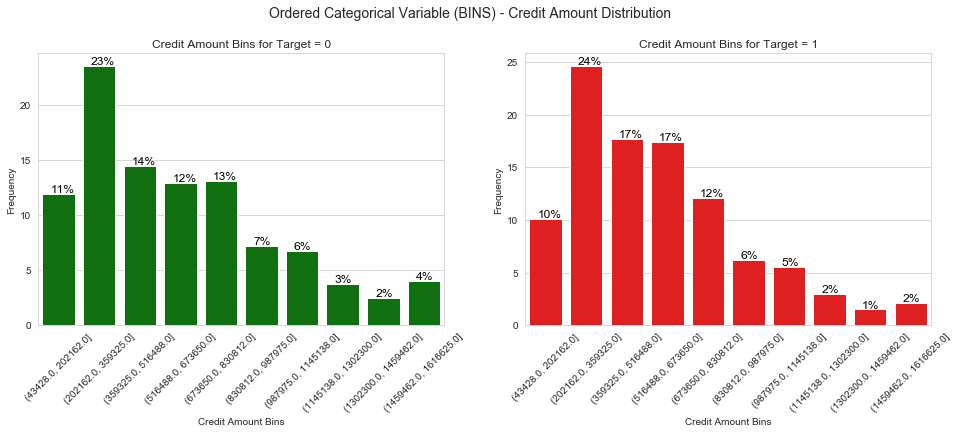

In [48]:
# AMT_GOODS_PRICE and AMT_CREDIT are highly correlated and hence there is no need to analyze both columns.
# We can analyze one of these columns and draw inference.
dist_continuous_numeric_univariate_analysis("AMT_CREDIT", "Credit Amount")
plot_bins_univariate_analysis("AMT_CREDIT", "Credit Amount")

####   Credit Amount Variable - Pattern & Inference 
1. The loan amount credited in the interval of 202162 to 516488 has higher loan default.
2. The loan amount credited above 987975 have lower loan default ratios. This is good as it indicates that most likely higher loan amount credits are granted to applicants after analyzing high impact parameters

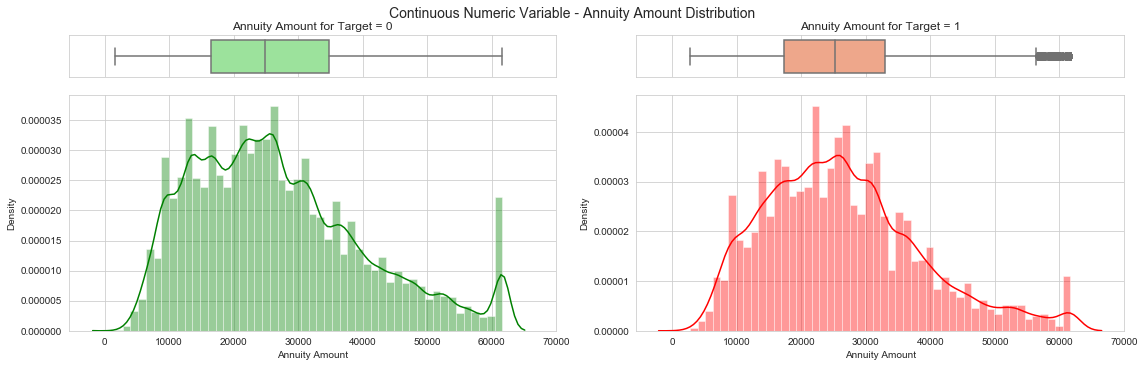

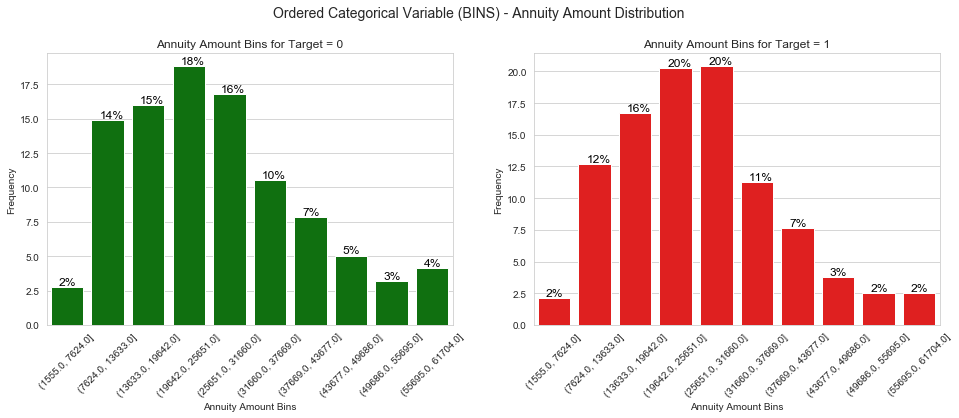

In [49]:
dist_continuous_numeric_univariate_analysis("AMT_ANNUITY", "Annuity Amount")
plot_bins_univariate_analysis("AMT_ANNUITY", "Annuity Amount")

####   Annuity Amount Variable - Pattern & Inference 
1. The monthly installment amount in the interval of 13633 to 31660 tend to have higher loan default cases.
2. In particular the installment interval of 16642 to 25651 shows much higher loan default.
3. Annuity above 37669 has lower default cases. Signifying the thoroughness followed while granting loans to these applicants.

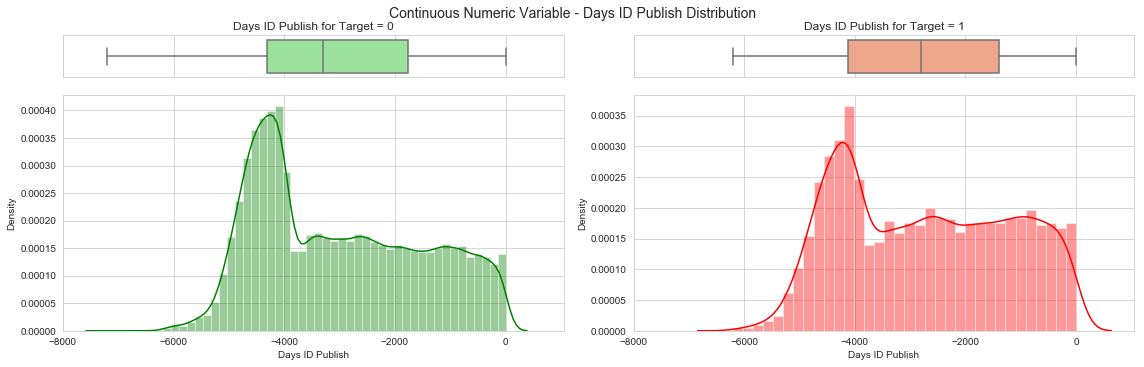

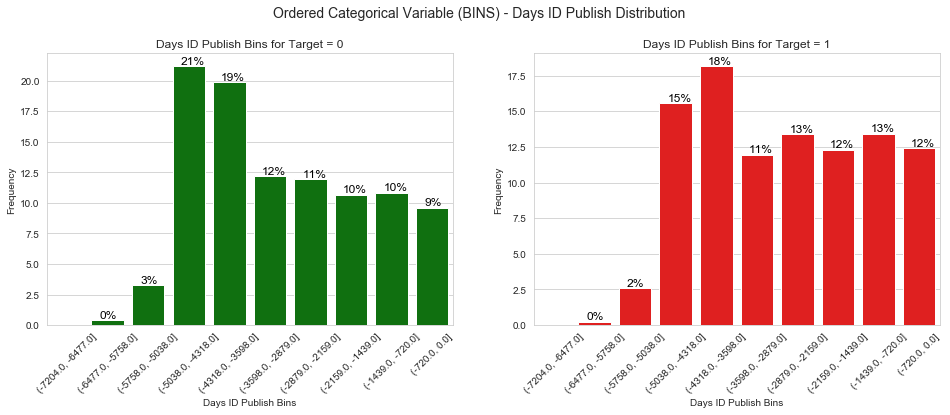

In [50]:
dist_continuous_numeric_univariate_analysis("DAYS_ID_PUBLISH", "Days ID Publish")
plot_bins_univariate_analysis("DAYS_ID_PUBLISH", "Days ID Publish")

####   Days ID Publish Variable - Pattern & Inference 
1. The data indicates that applicants who changed their ID in the past 3598 days which is about 10 years tend to default more in the loan repayment.
2. Applicants who have not changed ID in more than a decade showcases greater stability in loan repayment.

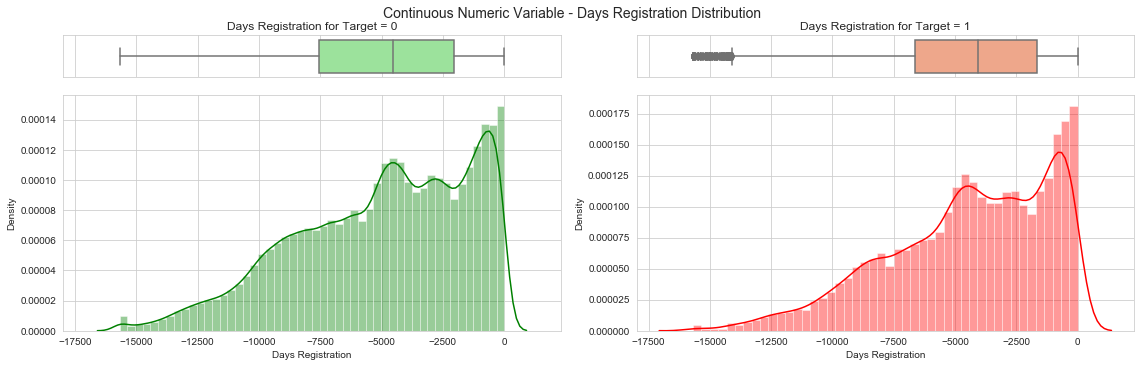

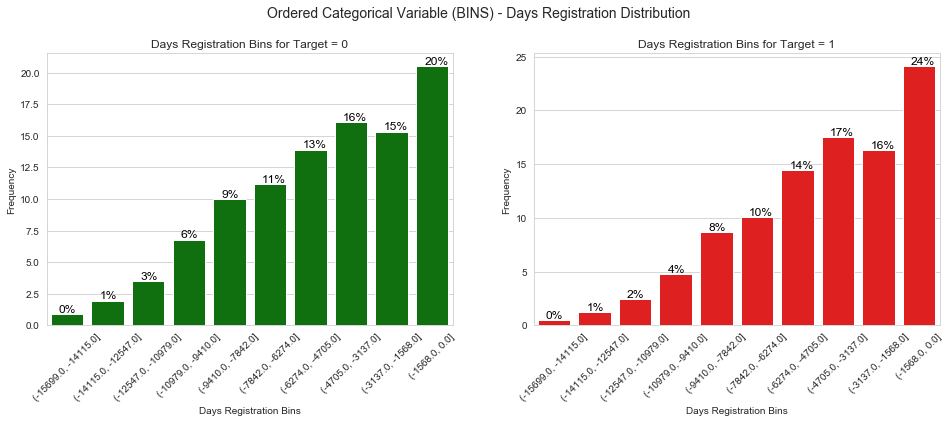

In [51]:
dist_continuous_numeric_univariate_analysis("DAYS_REGISTRATION", "Days Registration")
plot_bins_univariate_analysis("DAYS_REGISTRATION", "Days Registration")

####   Days Registration Variable - Pattern & Inference 
1. There is not much variation for this variable

#### Ordered Categorical  - Application Weekday

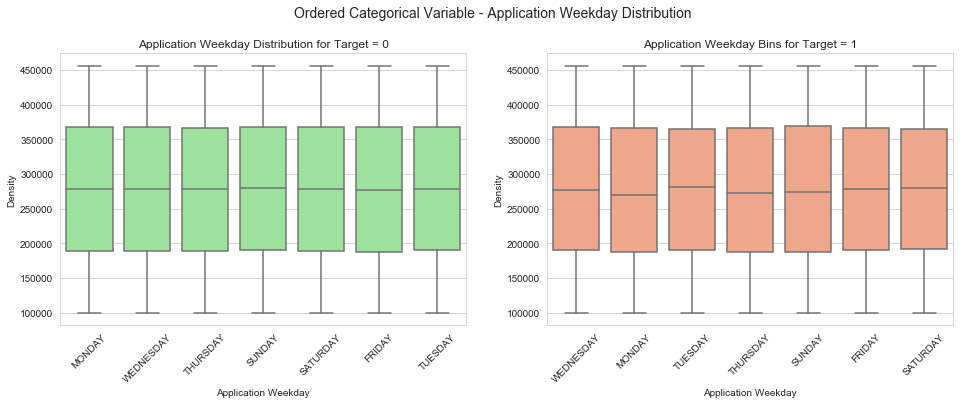

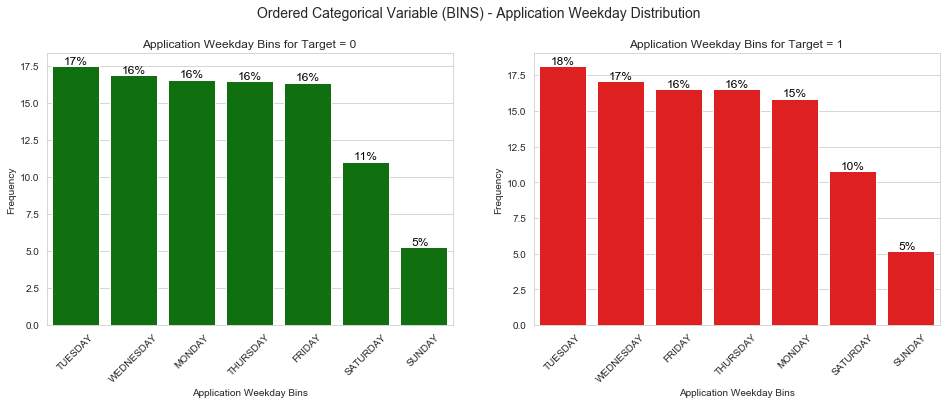

In [52]:
plot_box("WEEKDAY_APPR_PROCESS_START", "Application Weekday")

ser_weekday_T0 = df_appl_T0["WEEKDAY_APPR_PROCESS_START"].value_counts()
ser_weekday_T0 = np.round((ser_weekday_T0/len(df_appl_T0["WEEKDAY_APPR_PROCESS_START"]))*100,2)
ser_weekday_T1 = df_appl_T1["WEEKDAY_APPR_PROCESS_START"].value_counts()
ser_weekday_T1 = np.round((ser_weekday_T1/len(df_appl_T1["WEEKDAY_APPR_PROCESS_START"]))*100,2)

plot_bar(ser_weekday_T0, ser_weekday_T1, "Application Weekday")

####   Application Weekday Variable Variable - Pattern & Inference 
1. On Weekdays the loan applicants are quite uniform. Loans applied are Tuesday and Wednesday have a marginal increase in loan default.
2. No particular weekday otherwise influence seem to influence loan default.

##### Previous Application Data

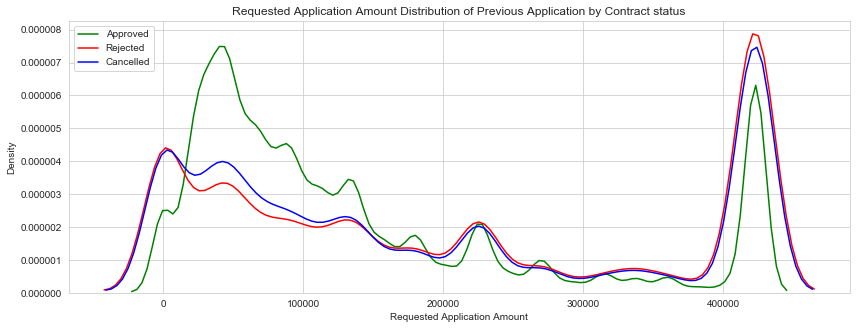

In [160]:
num_univariate_anaysis_prev('AMT_APPLICATION', "Requested Application Amount")

####   Requested Application Amount Variable of Previous Application - Pattern & Inference 
1. There is a steady dip of the Requested Application Amount Variable as the amount increases, however there were a lot of outliers in the data which is why there is skewness at an amount of 400000.
2. Requested Loan Application Amounts under 100000 seem to be getting approved and there is a dip as the requested amount increases.

<a id="DA-CatBi-Num"></a>

## 3.5 Numerical Bivariate Analysis

<a id="DA-Corr-Num"></a>

## 3.5.1 Correlation for Numerical Columns

#### Correlation for Continuous Variables
Determine the Continuous Variables by separating out all discrete variables for effective correlation.

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#numerics = ['float16', 'float32', 'float64']
cols_numeric=df_appl.select_dtypes(include=numerics).columns

#Remove columns having discrete values
cols_discrete_CNT = [col for col in df_appl if 'CNT_' in col]
cols_corr = list(set(cols_numeric) - set(cols_discrete_CNT))
cols_corr.remove('SK_ID_CURR')
#Remove other discrete variables
cols_corr.remove('REGION_RATING_CLIENT')
cols_corr.remove('REGION_RATING_CLIENT_W_CITY')
cols_corr.remove('HOUR_APPR_PROCESS_START')

# AMT_REQ_CREDIT have discrete values, hence removing it from correlation analysis.
cols_AMT_REQ_CREDIT = [col for col in df_appl if 'AMT_REQ_CREDIT' in col]
cols_corr = list(set(cols_corr) - set(cols_AMT_REQ_CREDIT))

#Removing Derived Metrics for correlation as that would be redundant
cols_derived_Ratio = [col for col in df_appl if 'RATIO_' in col]
cols_corr = list(set(cols_corr) - set(cols_derived_Ratio))

cols_corr = ['DAYS_REGISTRATION', 'EXT_SOURCE_2', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 
             'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'EXT_SOURCE_3', 'DAYS_EMPLOYED', 
             'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH']

<Figure size 1152x720 with 0 Axes>

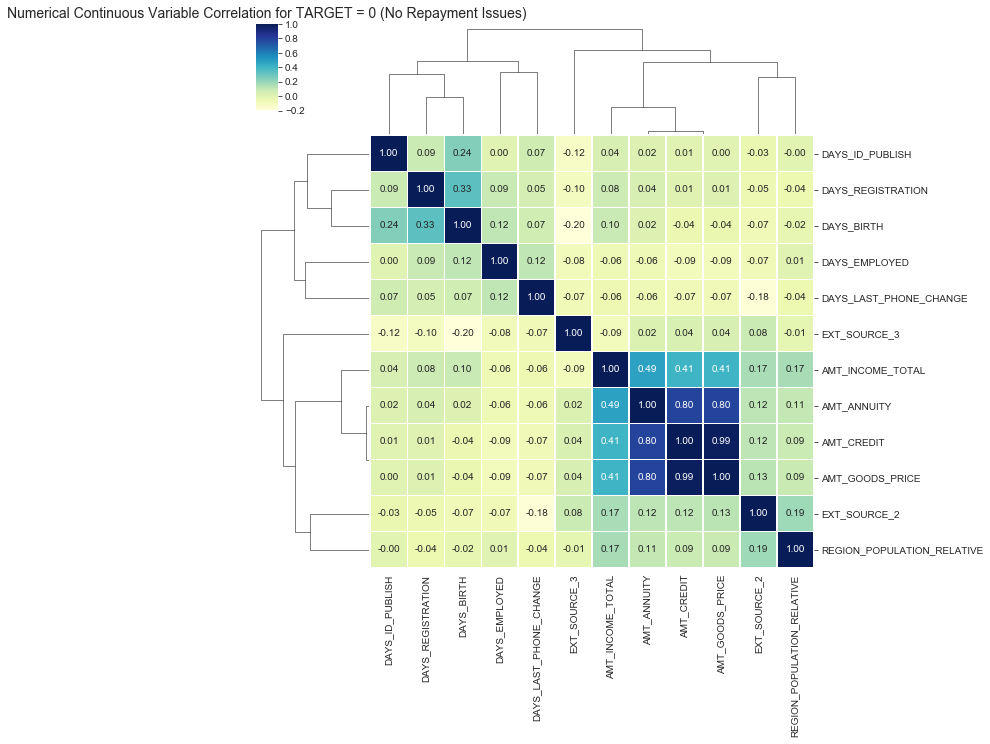

In [54]:
#For Target = 0
corr_T0 = df_appl_T0.loc[:,cols_corr].dropna().corr()
plt.figure(figsize=(16,10))
sns.clustermap(corr_T0, metric="correlation", linewidths=.5, annot=True, fmt='.2f', cmap="YlGnBu")
plt.title("Numerical Continuous Variable Correlation for TARGET = 0 (No Repayment Issues)", size=14, y=1.01)
plt.show()

<Figure size 1152x720 with 0 Axes>

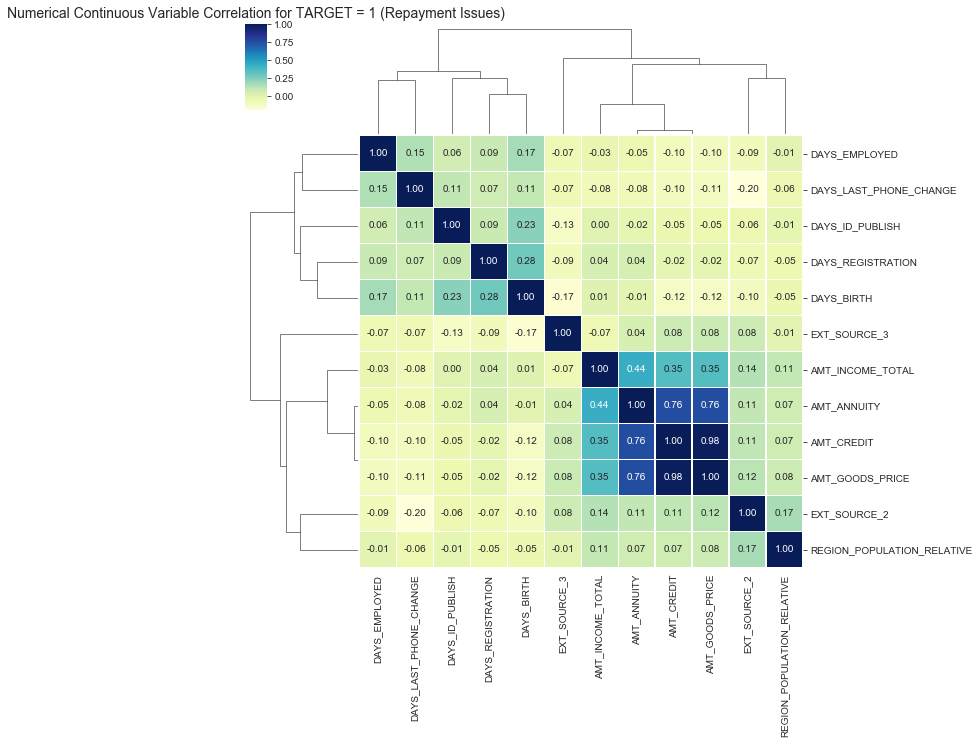

In [55]:
#For Target = 1
corr_T1 = df_appl_T1.loc[:,cols_corr].dropna().corr()
plt.figure(figsize=(16,10))
sns.clustermap(corr_T1, metric="correlation", linewidths=.5, annot=True, fmt='.2f', cmap="YlGnBu")
plt.title("Numerical Continuous Variable Correlation for TARGET = 1 (Repayment Issues)", size=14, y=1.01)
plt.show()

In [56]:
# Top 10 POSITIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES
print("Target=0: Top 10 POSITIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES")
print(corr_T0.unstack().sort_values(ascending=False).drop_duplicates()[1:11])
print("\n")
print("Target=1: Top 10 POSITIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES")
print(corr_T1.unstack().sort_values(ascending=False).drop_duplicates()[1:11])

Target=0: Top 10 POSITIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES
AMT_GOODS_PRICE   AMT_CREDIT                    0.985444
                  AMT_ANNUITY                   0.798634
AMT_ANNUITY       AMT_CREDIT                    0.796808
                  AMT_INCOME_TOTAL              0.488545
AMT_INCOME_TOTAL  AMT_GOODS_PRICE               0.408532
                  AMT_CREDIT                    0.406272
DAYS_BIRTH        DAYS_REGISTRATION             0.333013
                  DAYS_ID_PUBLISH               0.242885
EXT_SOURCE_2      REGION_POPULATION_RELATIVE    0.189636
AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE    0.169961
dtype: float64


Target=1: Top 10 POSITIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES
AMT_GOODS_PRICE   AMT_CREDIT                    0.981536
AMT_ANNUITY       AMT_GOODS_PRICE               0.760390
                  AMT_CREDIT                    0.760331
AMT_INCOME_TOTAL  AMT_ANNUITY                   0.436763
                  AMT_GOODS_PRICE              

In [57]:
# Top 10 NEGATIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES
print("Target=0: Top 10 NEGATIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES")
print(corr_T0.unstack().sort_values(ascending=False).drop_duplicates()[-10:])
print("\n")
print("Target=1: Top 10 NEGATIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES")
print(corr_T1.unstack().sort_values(ascending=False).drop_duplicates()[-10:])

Target=0: Top 10 NEGATIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES
DAYS_LAST_PHONE_CHANGE  AMT_GOODS_PRICE    -0.072594
DAYS_EMPLOYED           EXT_SOURCE_2       -0.073864
                        EXT_SOURCE_3       -0.082394
AMT_CREDIT              DAYS_EMPLOYED      -0.087590
DAYS_EMPLOYED           AMT_GOODS_PRICE    -0.088675
EXT_SOURCE_3            AMT_INCOME_TOTAL   -0.089163
DAYS_REGISTRATION       EXT_SOURCE_3       -0.103409
DAYS_ID_PUBLISH         EXT_SOURCE_3       -0.124645
DAYS_LAST_PHONE_CHANGE  EXT_SOURCE_2       -0.183032
DAYS_BIRTH              EXT_SOURCE_3       -0.197200
dtype: float64


Target=1: Top 10 NEGATIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES
AMT_CREDIT              DAYS_EMPLOYED            -0.095102
DAYS_BIRTH              EXT_SOURCE_2             -0.100988
AMT_GOODS_PRICE         DAYS_EMPLOYED            -0.101411
AMT_CREDIT              DAYS_LAST_PHONE_CHANGE   -0.102836
AMT_GOODS_PRICE         DAYS_LAST_PHONE_CHANGE   -0.109892
AMT_CREDIT          

####   Numerical Variable Correlation - Pattern & Inference 
##### 1. For Target=1 and Target=0 the following <b>columns in common</b> had high <font color="Orange"><b>positive association</b> :
                                             TARGET=1   TARGET=0
        AMT_GOODS_PRICE    AMT_CREDIT          0.98       0.99
        AMT_GOODS_PRICE    AMT_ANNUITY         0.76       0.80
        AMT_CREDIT         AMT_ANNUITY         0.76       0.80
        AMT_ANNUITY        AMT_INCOME_TYPE     0.44       0.49
        AMT_CREDIT         AMT_INCOME_TYPE     0.35       0.41
        DAYS_BIRTH         DAYS_REGISTRATION   0.28       0.33        
        
Extremely High Correlation of AMT_GOODS_PRICE and AMT_CREDIT suggests that we can drop one column and do our analysis on one of them. Since, it is highly likely that the analysis results on both columns will be the same.

#### Pair Plot for Target = 0 for Continuous Numerical Variables

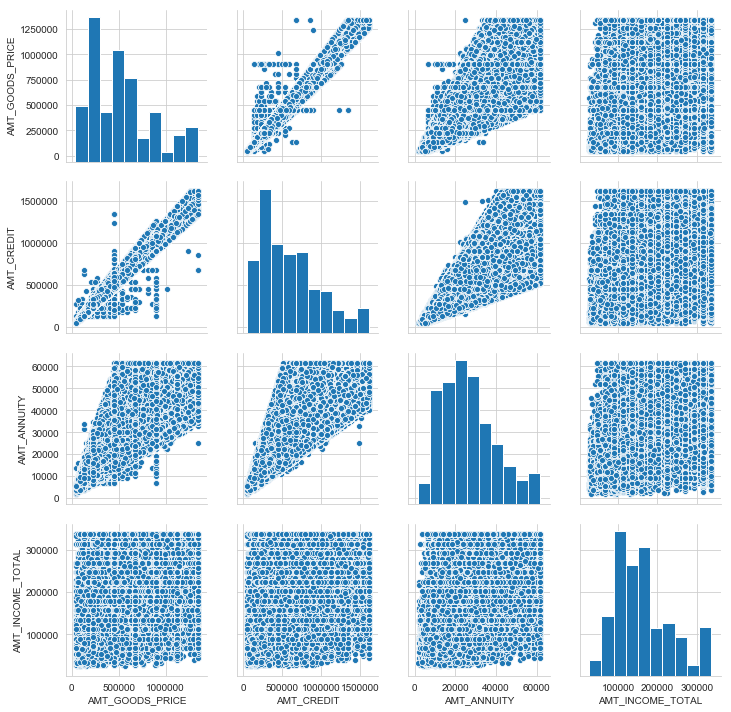

In [58]:
# Pair Plotting Highly Correlated Continous Variables
cols_pairs = ['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL']
sns.pairplot(df_appl_T0[cols_pairs])

#### Pair Plot for Target = 1 for Continuous Numerical Variables

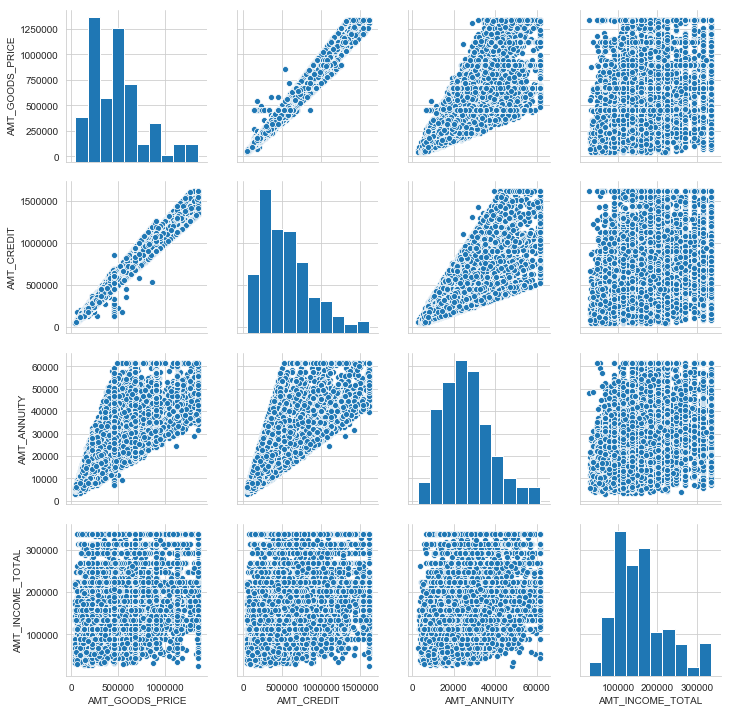

In [59]:
ax = sns.pairplot(df_appl_T1[cols_pairs])

####   Pair Plot - Numerical Variable Correlation - Pattern & Inference 
1. For both Target = 0 and Target = 1 the correlation between these continuous variables shows similar distribution.
2. AMT_GOODS_PRICE and AMT_CREDIT being highly correlated.
3. Followed by AMT_ANNUITY with AMT_GOODS_PRICE and AMT_CREDIT
4. Followed by AMT_INCOME_TOTAL with the remaining three variables.

This analysis suggesting that the higher loan amount credit has higher installment which is the annuity.

In loan default analysis it is evident that the loan amount credit and applicant's income has lower correlation than in cases where there is no default. This suggests that further strictness in terms of ensuring corret loan amount is approved based on income bracked is necessary.

##### Previous Application Data

In [60]:
for i in prev_cols_continuous:
    df_prev_appl.loc[np.isnan(df_prev_appl[i]), [i]] = df_prev_appl[i].median()

<Figure size 1152x720 with 0 Axes>

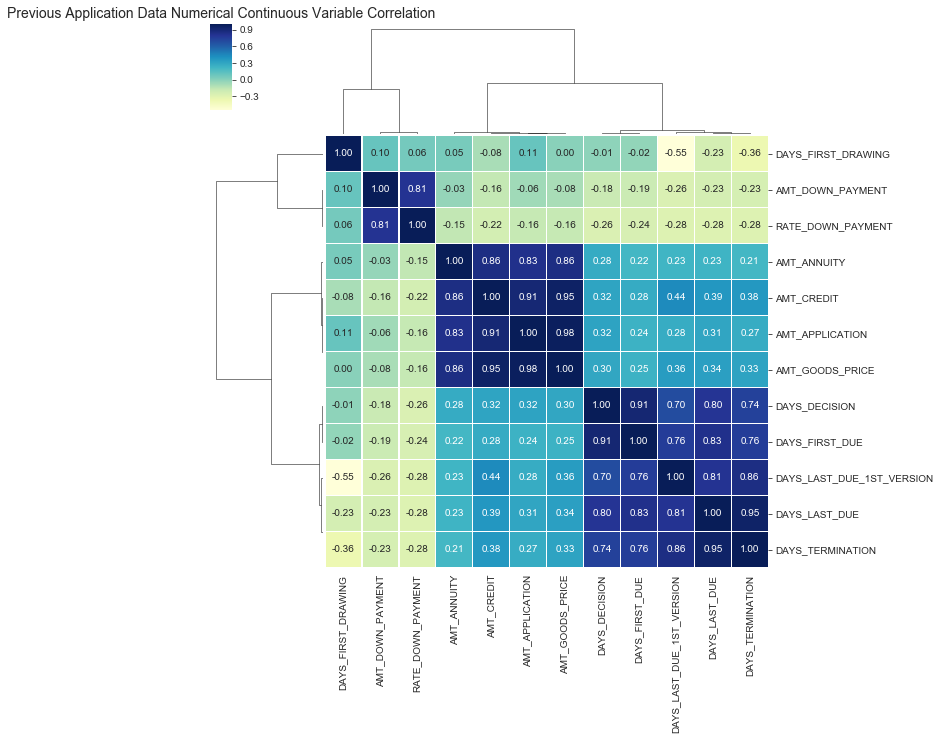

In [62]:
#For Numerical Continuous Variables in Previous Application
prev_corr = df_prev_appl.loc[:,['AMT_ANNUITY',  'AMT_APPLICATION', 'AMT_DOWN_PAYMENT', 'AMT_CREDIT',
 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'DAYS_FIRST_DRAWING',  'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION']].dropna().corr()
plt.figure(figsize=(16,10))
sns.clustermap(prev_corr, metric="correlation", linewidths=.5, annot=True, fmt='.2f', cmap="YlGnBu")
plt.title("Previous Application Data Numerical Continuous Variable Correlation", size=14, y=1.01)
plt.show()

In [66]:
# Top 10 POSITIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES
print("Previous Applicatin Data - Top 10 POSITIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES")
print(prev_corr.unstack().sort_values(ascending=False).drop_duplicates()[1:11])
print("\n")

Previous Applicatin Data - Top 10 POSITIVE ASSOCIATION NUMERICAL CONTINUOUS VARIABLES
AMT_GOODS_PRICE            AMT_APPLICATION     0.979086
                           AMT_CREDIT          0.952739
DAYS_TERMINATION           DAYS_LAST_DUE       0.950221
DAYS_DECISION              DAYS_FIRST_DUE      0.910288
AMT_APPLICATION            AMT_CREDIT          0.908573
AMT_CREDIT                 AMT_ANNUITY         0.860180
DAYS_LAST_DUE_1ST_VERSION  DAYS_TERMINATION    0.858975
AMT_GOODS_PRICE            AMT_ANNUITY         0.855488
AMT_ANNUITY                AMT_APPLICATION     0.831121
DAYS_FIRST_DUE             DAYS_LAST_DUE       0.830269
dtype: float64




####   Previous Application Data Numerical Variable Correlation - Pattern & Inference 

Following columns are highly correlated in Previous Application Data:-

    AMT_GOODS_PRICE            AMT_APPLICATION     0.979086
                               AMT_CREDIT          0.952739
    DAYS_TERMINATION           DAYS_LAST_DUE       0.950221
    DAYS_DECISION              DAYS_FIRST_DUE      0.910288
    AMT_APPLICATION            AMT_CREDIT          0.908573
    AMT_CREDIT                 AMT_ANNUITY         0.860180
    DAYS_LAST_DUE_1ST_VERSION  DAYS_TERMINATION    0.858975
    AMT_GOODS_PRICE            AMT_ANNUITY         0.855488
    AMT_ANNUITY                AMT_APPLICATION     0.831121
    DAYS_FIRST_DUE             DAYS_LAST_DUE       0.830269

####   Comparing Application Data and Previous Application Data Continuous Numerical Variables 

The following are common columns having a high correlation in both the datasets:-

    AMT_GOOD_PRICE
    AMT_CREDIT
    AMT_ANNUITY

<a id="DA-AP"></a>

### 3.5.2 Analysis on Current Application and Previous Application Joins

#### Check forPrevious Rejection based on TARGET = 1 to see if there is a pattern

In [304]:
df_curr_ID_T1 = df_appl_T1.loc[:,['SK_ID_CURR']] #defaulters
df_prev_ID = df_prev_appl.loc[:,['SK_ID_CURR','NAME_CONTRACT_STATUS']] 

df_T1_prev = df_curr_ID.merge(df_prev_ID, how='inner', on='SK_ID_CURR')
df_T1_prev = df_T1_prev.drop(['SK_ID_CURR'],axis=1)
# Count of Contract Status where TARGET = 1
s1 = df_T1_prev['NAME_CONTRACT_STATUS'].value_counts().sort_index()
# Get overall count of Contract Status of Previous Application
s_Total = df_prev_appl['NAME_CONTRACT_STATUS'].value_counts().sort_index()
ser = np.round(s1.div(s_Total)*100,2)

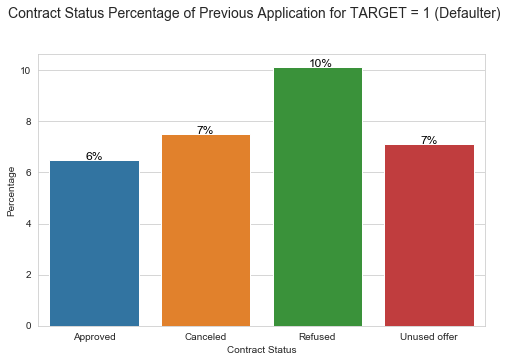

In [305]:
f,ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
f.suptitle("Contract Status Percentage of Previous Application for TARGET = 1 (Defaulter)", size=14, y=1.01)
ax = sns.barplot(x=ser.index, y=ser.values)
ax.set(ylabel="Percentage")
ax.set(xlabel="Contract Status")
for i in ax.patches:
    if (i.get_height() != 0):
        ax.text(i.get_x()+0.32, i.get_y() + i.get_height(), str(int(i.get_height())) + "%", fontsize=12, color='black')

####   Pattern with Target = 1 and Contract Status for Previous Application 
1. Applicants who have been Refused loan by the company in the past are the ones that default the most.
2. Applicant history with Refused at 10%, followed by Canceled at 7%, Unused offer at 7% and Approved which is the lowest percent of defaults in current applications with 6%

<a id="DA-CatBi"></a>

## 3.6 Bivariate Analysis on Categorical Variables (Impact and Across)

<a id="DA-Tool"></a>

### 3. 6.1 Custom TOOL for Analysis For Application Data
Tool for analysis of categorical variables for quick exploration
    -  Univariate
    -  Categorical Bivariate Analysis
The analysis and data interpretation is done mentioned in the subsequent sections.

In [162]:
def generic_bivariate_analysis(col1, col2, Impact, Across):
    func = lambda x: np.round(x.count()/df_appl_T0.shape[0],4)
    df = df_appl_T0.pivot_table(index=col1, columns=col2, values='SK_ID_CURR', aggfunc=func)
    plt.figure(figsize=[df.shape[1]*1.5,df.shape[0]*0.8])
    plt.title(Across + " Distribution for TARGET=0 over " + Impact,fontsize=14, y=1.05)
    ax = sns.heatmap(df, annot=True,linewidths=.5, fmt='.1%', cmap="YlGnBu", annot_kws={"size": 12})
    plt.ylabel(Impact)
    plt.xlabel(Across)
    ax.xaxis.set_label_position("top")
    ax.xaxis.tick_bottom()
    plt.show()
    
    func = lambda x: np.round(x.count()/df_appl_T1.shape[0],4)
    df = df_appl_T1.pivot_table(index=col1, columns=col2, values='SK_ID_CURR', aggfunc=func)
    plt.figure(figsize=[df.shape[1]*1.5,df.shape[0]*0.8])
    plt.title(Across + " Distribution for TARGET=1 over " + Impact,fontsize=14, y=1.05)
    ax = sns.heatmap(df, annot=True,linewidths=.5, fmt='.1%', cmap="YlGnBu", annot_kws={"size": 12})
    plt.ylabel(Impact)
    plt.xlabel(Across)
    ax.xaxis.set_label_position("top")
    ax.xaxis.tick_bottom()

In [164]:
# Running Tool
from ipywidgets import interact

col_dict = {'-- select --':'0','Organization Type':'ORGANIZATION_TYPE','Occupation':'OCCUPATION_TYPE', 'Family Status':'NAME_FAMILY_STATUS', 'Gender':'CODE_GENDER',
            'Contract Type':'NAME_CONTRACT_TYPE','Owns Car?':'FLAG_OWN_CAR','Owns Reality?':'FLAG_OWN_REALTY',
           'Income Type':'NAME_INCOME_TYPE','Education Type':'NAME_EDUCATION_TYPE','Family Status':'NAME_FAMILY_STATUS',
           'Housing Type':'NAME_HOUSING_TYPE'}
lst_Col_Key = list(col_dict.keys())

def cmb_change(Impact, Across):
    col1 = col_dict.get(Impact)
    col2 = col_dict.get(Across)
    if (col1 != col2 and col1 != '0' and col2 != '0'):
        generic_bivariate_analysis(col1, col2, Impact, Across)
    elif (col1 !='0'):
        unordered_categorical_univariate_analysis(col1, Impact)
print("Select only Impact Variable for Univariate Analysis")
print("Select both Impact and Across Variables for Categorical Bivariate Analysis")
interact(cmb_change, Impact= lst_Col_Key, Across=lst_Col_Key)


Select only Impact Variable for Univariate Analysis
Select both Impact and Across Variables for Categorical Bivariate Analysis


interactive(children=(Dropdown(description='Impact', options=('-- select --', 'Organization Type', 'Occupation…

<function __main__.cmb_change(Impact, Across)>